<a href="https://colab.research.google.com/github/ziatdinovmax/GPim/blob/master/examples/notebooks/GP_based_exploration_exploitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian-process based exploration-exploitation

---

This notebook demonstrates an example of GP-based exploration-exploitation in GPim on a simple toy data

---

Prepared by Maxim Ziatdinov (April 2020)

Install GPim:

In [ ]:
!pip install gpim

Imports:

In [2]:
import gpim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#@title Helper functions { form-width: "10%" }
def plot_exploration_results(func_val, gp_pred):
    for i, (func, pred) in enumerate(zip(func_val, gp_pred)):
        print('Step {}'.format(i+1))
        _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
        ax1.imshow(func, origin='bottom')
        ax2.imshow(pred[0], origin='bottom')
        ax3.imshow(pred[1], origin='bottom')
        ax1.set_title('Input')
        ax2.set_title("GP prediction")
        ax3.set_title("Uncertainty")
        plt.show()

def mask_edges(imgdata, dist_edge):
    e1, e2 = imgdata.shape
    mask = np.ones((e1, e2)) * np.nan
    mask[dist_edge[0]:e1-dist_edge[0],
         dist_edge[1]:e2-dist_edge[1]] = 1
    return mask

Start by creating a dummy 2D function with 3 peaks represented by 2D Gaussians of different width and intensities, two of which slightly overlap.

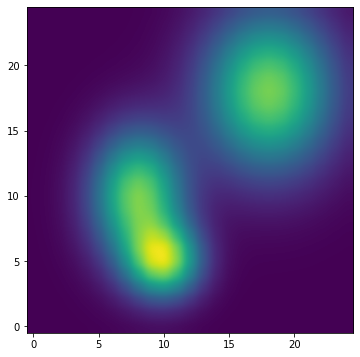

In [4]:
# Define a trial function
def trial_func(idx):
    """
    Takes a list of indices as input and returns function value at these indices
    """
    def func(x0, y0, a, b, fwhm): 
        return np.exp(-4*np.log(2) * (a*(idx[0]-x0)**2 + b*(idx[1]-y0)**2) / fwhm**2)
    Z1 = func(5, 10, 1, 1, 4.5)
    Z2 = func(10, 8, 0.75, 1.5, 7)
    Z3 = func(18, 18, 1, 1.5, 10)
    return Z1 + Z2 + Z3

# Generate grid data and calculate trial function values on a grid
x, y = np.meshgrid(np.linspace(0,24,25), np.linspace(0,24,25), indexing='ij')
Z = trial_func([x, y])
# Plot
plt.figure(figsize=(6, 6))
plt.imshow(Z, origin='bottom', Interpolation='Gaussian')
plt.show()

Create an observation matrix and seed it with several random observations:

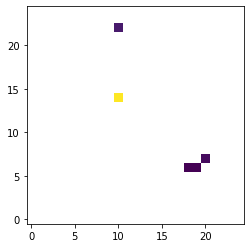

In [5]:
np.random.seed(42)
Z_sparse = np.ones_like(Z) * np.nan
idx = np.random.randint(0, Z.shape[0], size=(5, 2))
for i in idx:
    Z_sparse[tuple(i)] = trial_func(i) 
plt.imshow(Z_sparse, origin='bottom')

Initiate and run GP-based Bayesian optimization (BO):

In [6]:
# Get full and sparse grids
X_full = gpim.utils.get_full_grid(Z_sparse)
X_sparse= gpim.utils.get_sparse_grid(Z_sparse)
# Initialize Bayesian optimizer with an 'expected improvement' acquisition function
boptim = gpim.boptimizer(
    X_sparse, Z_sparse, X_full, 
    trial_func, acquisition_function='ei',
    exploration_steps=50,
    use_gpu=False, verbose=1)
# Run Bayesian optimization
boptim.run()


Exploration step 1 / 50
Model training...
average time per iteration: 0.006999999999999999 s
training completed in 3.94 s
Final parameter values:
 amp: 0.0358, lengthscale: [ 4.5529 12.4821], noise: 1.8e-06
Computing acquisition function...
Model training...
average time per iteration: 0.0038 s
training completed in 3.67 s
Final parameter values:
 amp: 0.0315, lengthscale: [5.2424 5.2111], noise: 0.0

Exploration step 2 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0037 s
training completed in 3.62 s
Final parameter values:
 amp: 0.0294, lengthscale: [5.3729 3.7558], noise: 0.0

Exploration step 3 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0038 s
training completed in 3.67 s
Final parameter values:
 amp: 0.0939, lengthscale: [2.5782 4.7919], noise: 0.0

Exploration step 4 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0036 s
training completed in 3.75 s
Final pa

Plot input data and GP predictions at each step:

Step 1


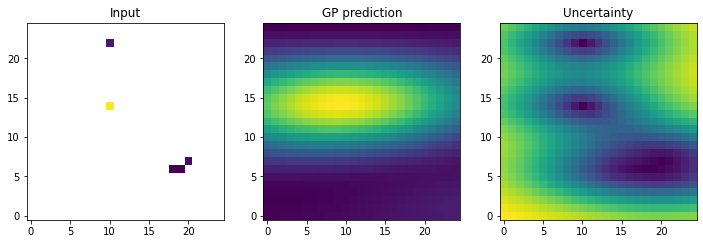

Step 2


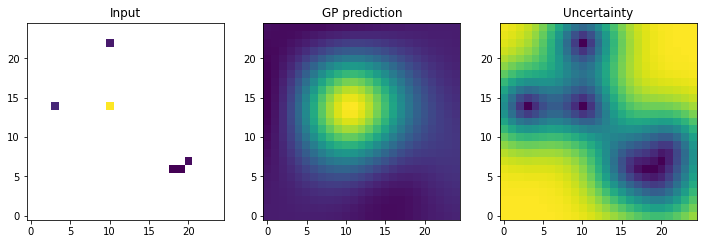

Step 3


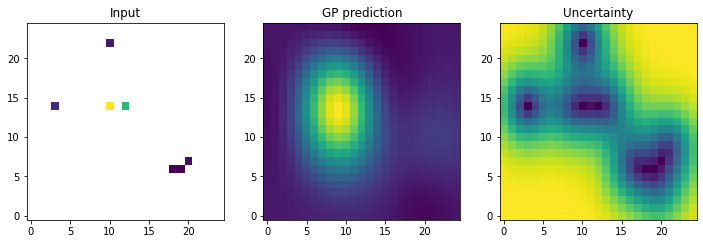

Step 4


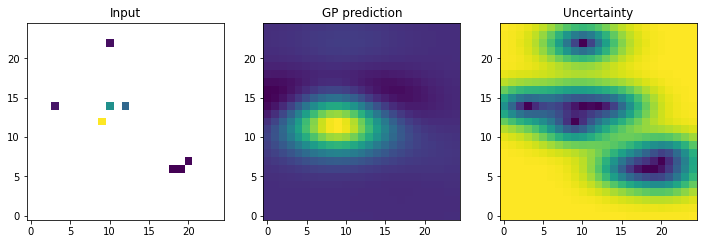

Step 5


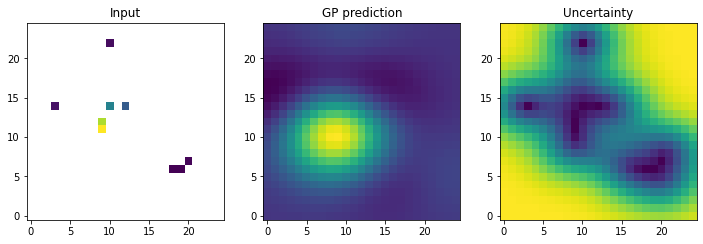

Step 6


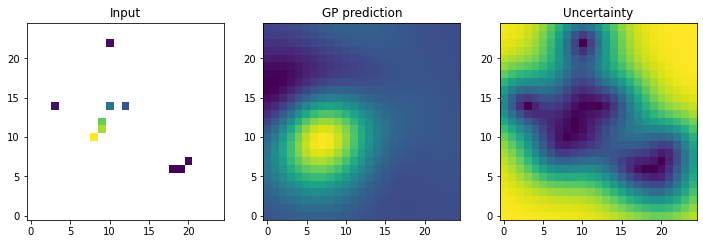

Step 7


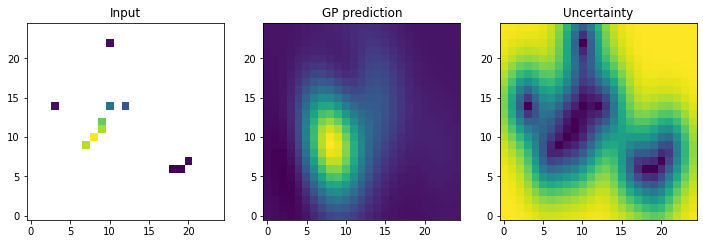

Step 8


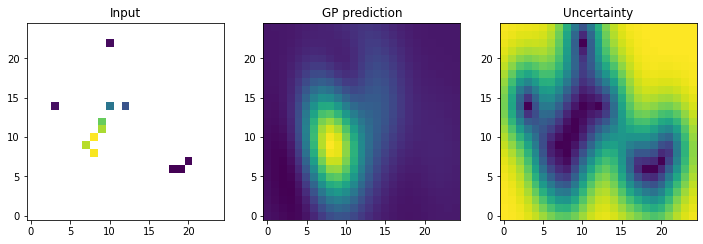

Step 9


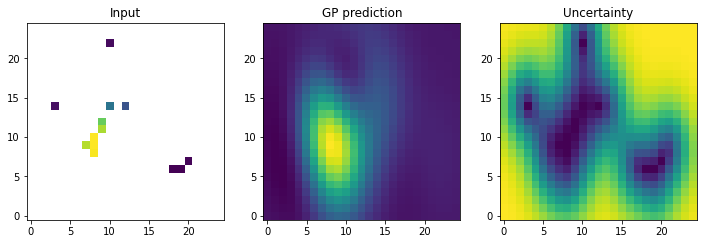

Step 10


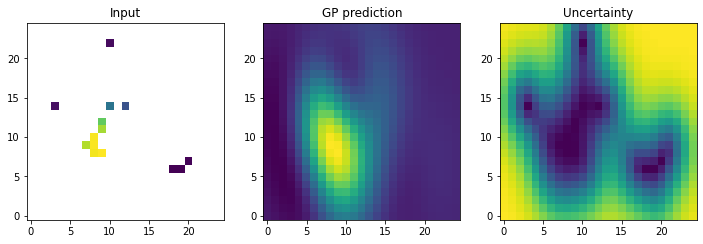

Step 11


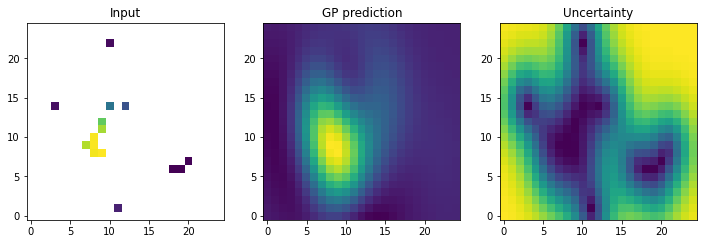

Step 12


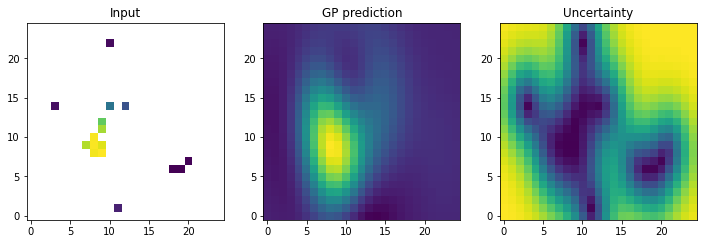

Step 13


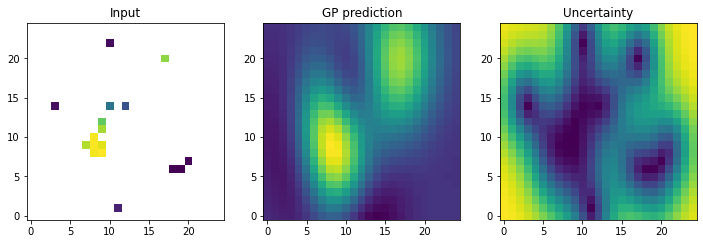

Step 14


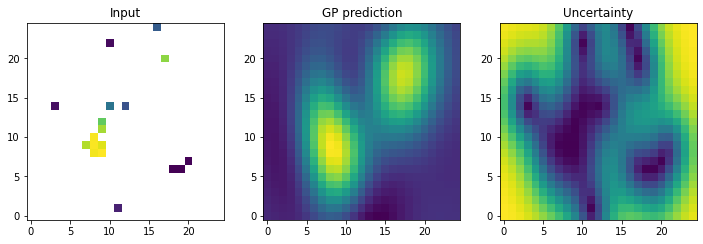

Step 15


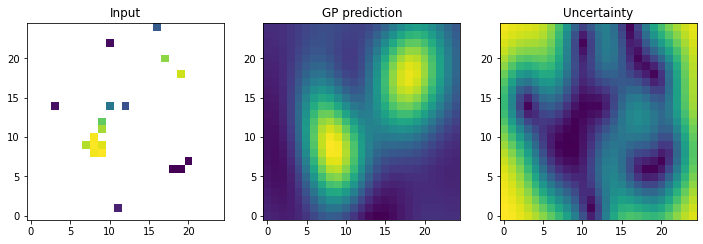

Step 16


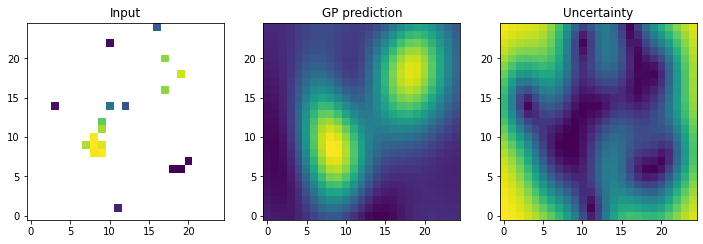

Step 17


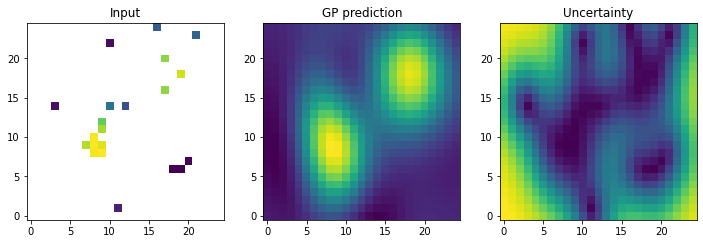

Step 18


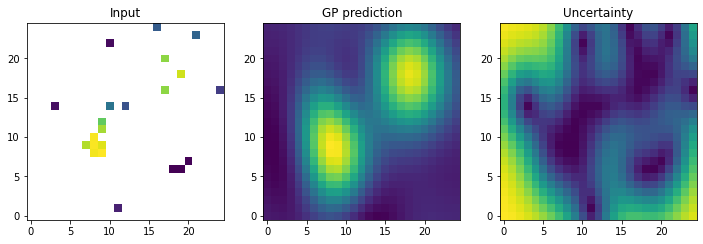

Step 19


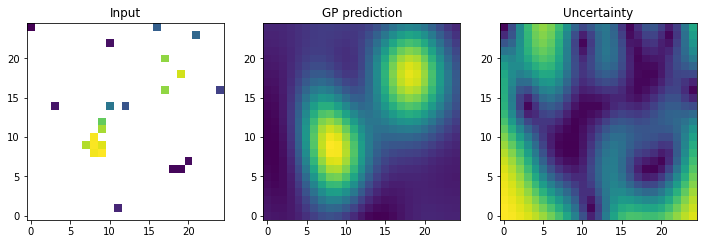

Step 20


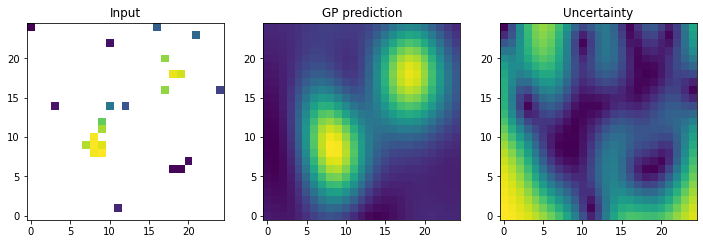

Step 21


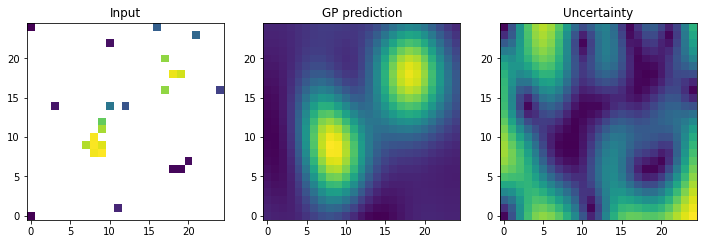

Step 22


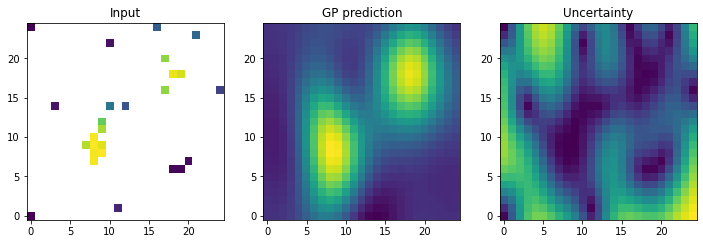

Step 23


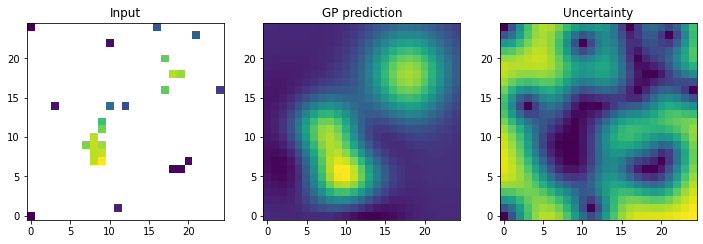

Step 24


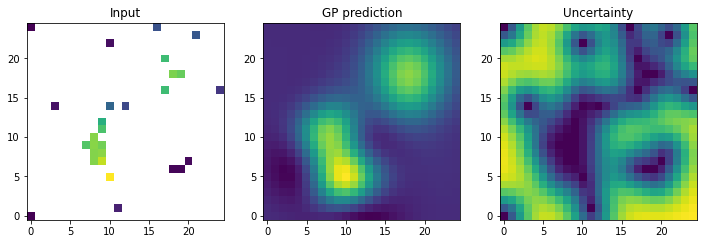

Step 25


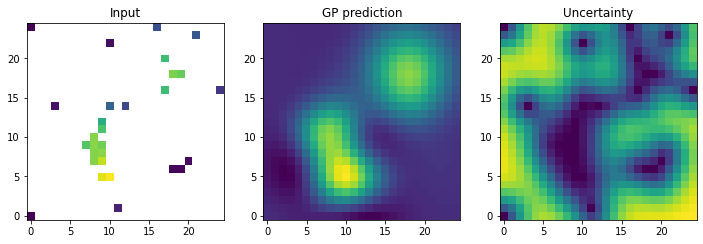

Step 26


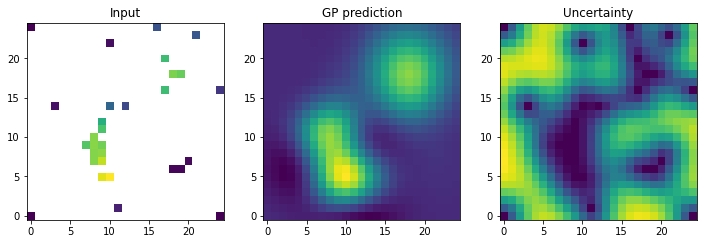

Step 27


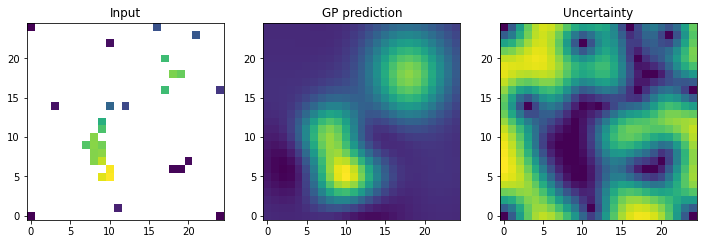

Step 28


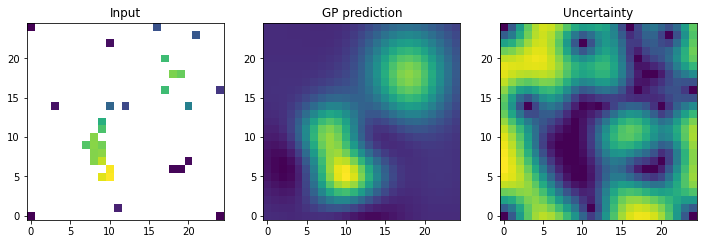

Step 29


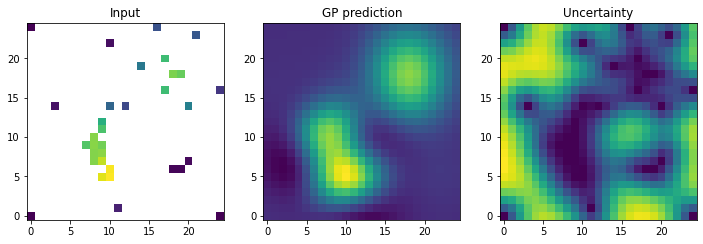

Step 30


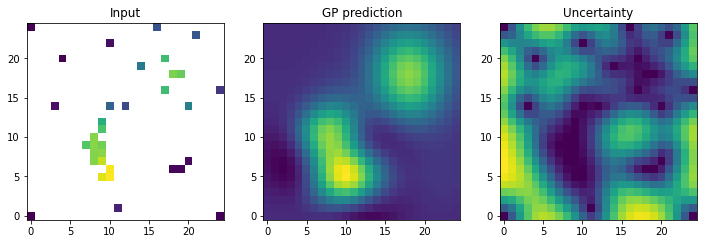

Step 31


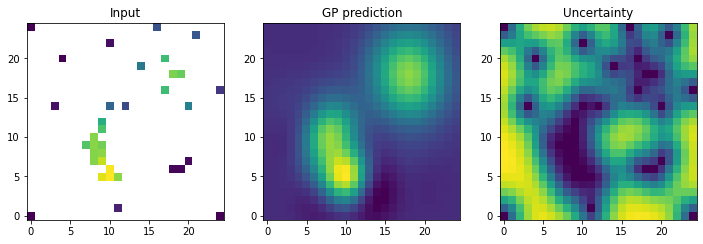

Step 32


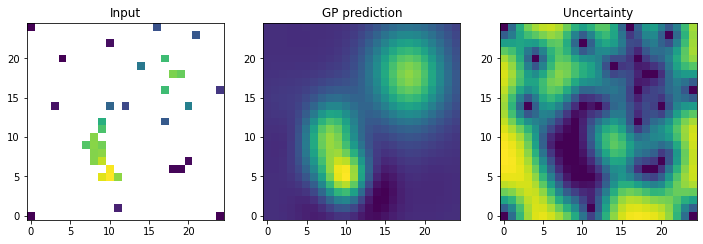

Step 33


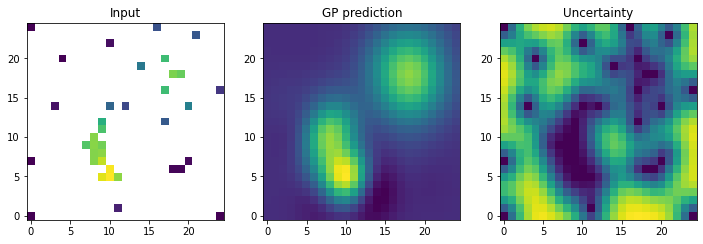

Step 34


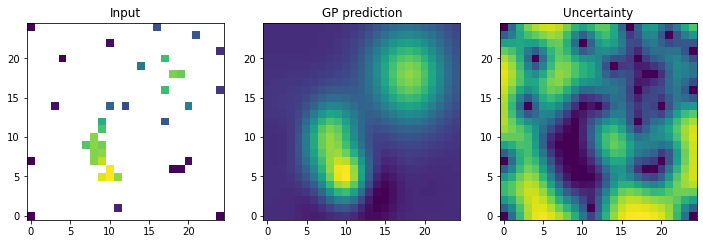

Step 35


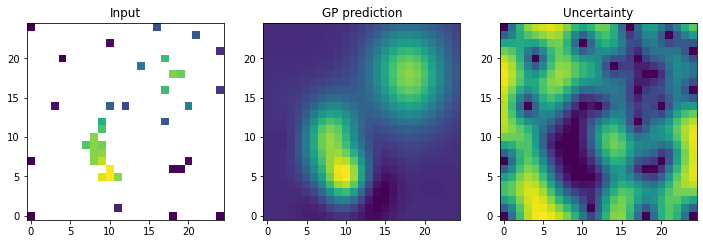

Step 36


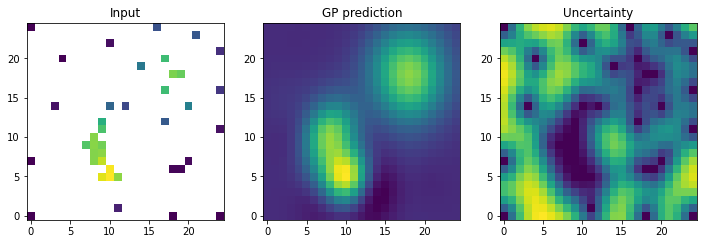

Step 37


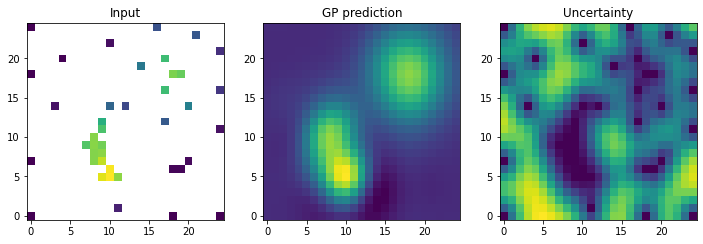

Step 38


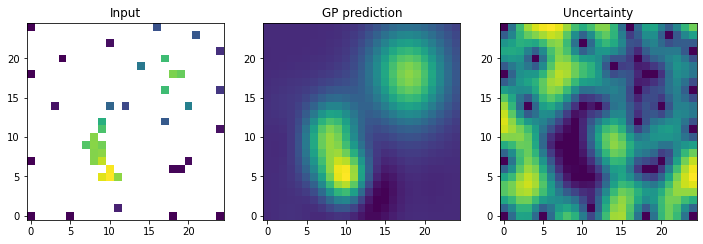

Step 39


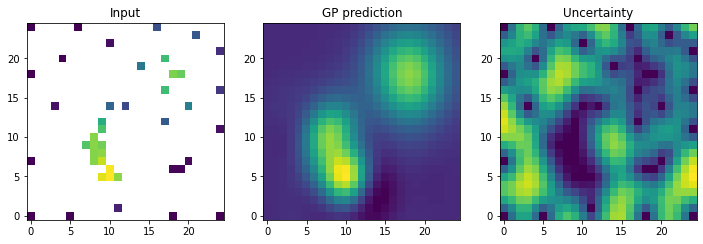

Step 40


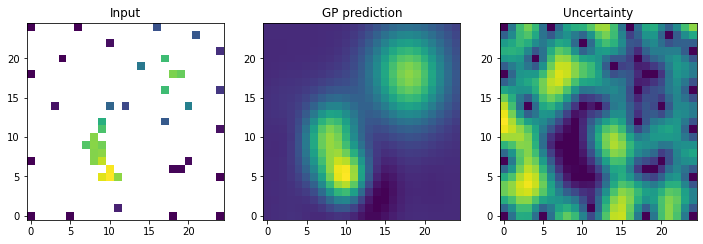

Step 41


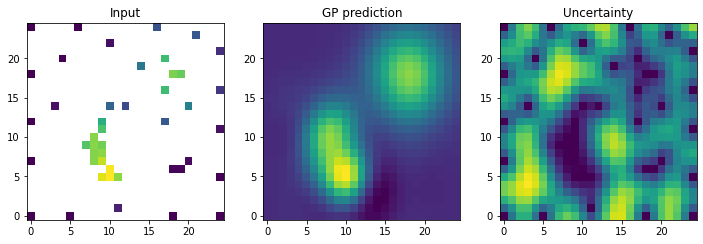

Step 42


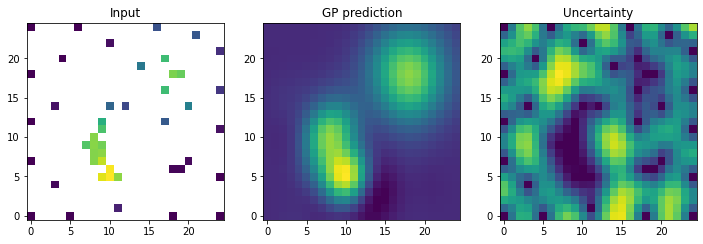

Step 43


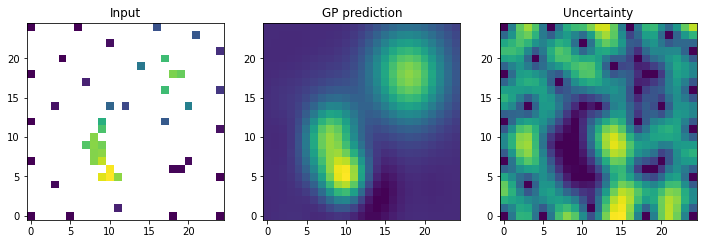

Step 44


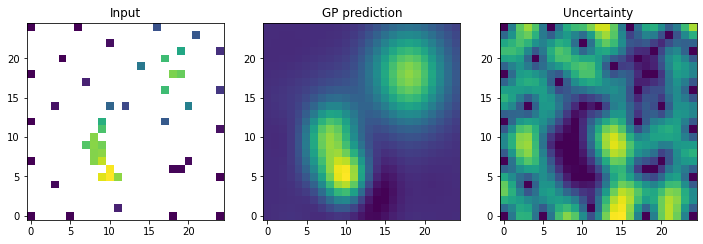

Step 45


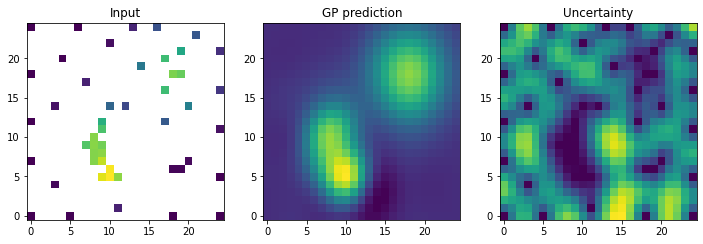

Step 46


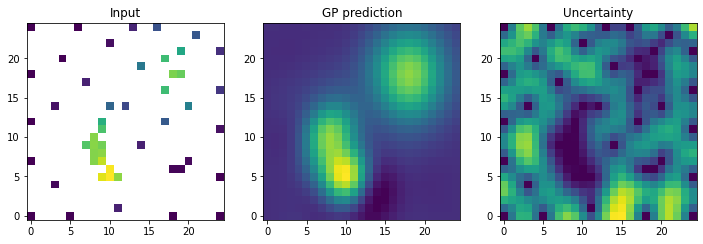

Step 47


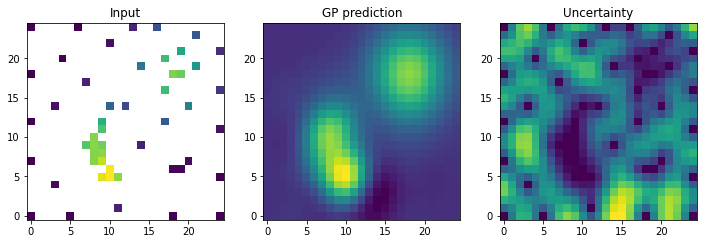

Step 48


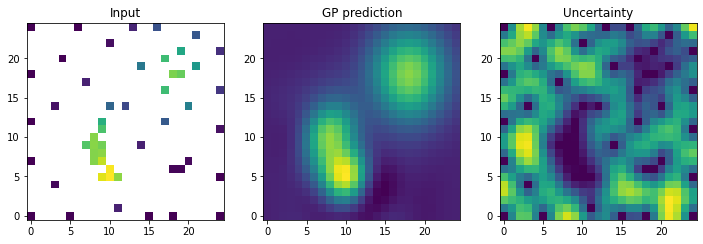

Step 49


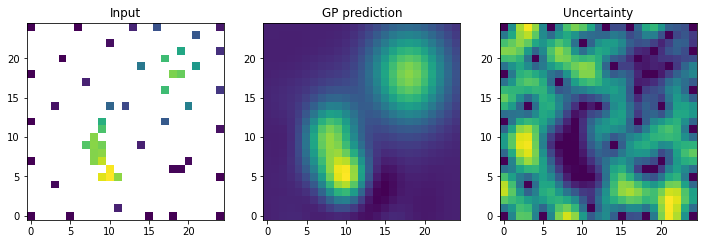

Step 50


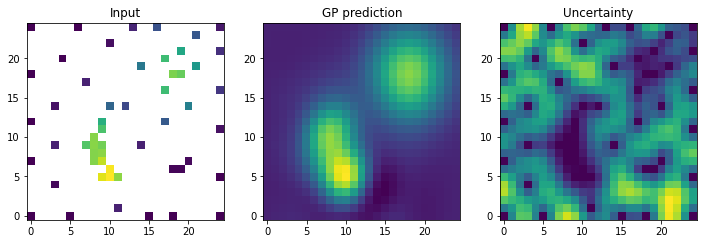

In [7]:
plot_exploration_results(boptim.target_func_vals, boptim.gp_predictions)

Plot all the query points:

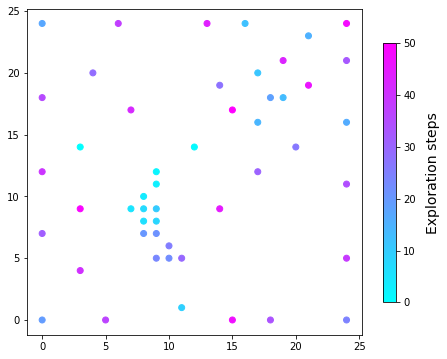

In [8]:
gpim.utils.plot_query_points(boptim.indices_all, plot_lines=False)

Add mask (regions where the acquisition function will not be evaluated):

In [9]:
Z_mask = mask_edges(np.ones_like(Z_sparse), (2, 2))

Same BO but with mask:

In [10]:
# Get full and sparse grids
X_full = gpim.utils.get_full_grid(Z_sparse)
X_sparse= gpim.utils.get_sparse_grid(Z_sparse)
# Initialize Bayesian optimizer with an 'expected improvement' acquisition function
boptim = gpim.boptimizer(
    X_sparse, Z_sparse, X_full, 
    trial_func, acquisition_function='ei',
    exploration_steps=50, mask=Z_mask,  # add mask
    use_gpu=False, verbose=1)
# Run Bayesian optimization
boptim.run()


Exploration step 1 / 50
Model training...
average time per iteration: 0.0036 s
training completed in 3.75 s
Final parameter values:
 amp: 0.0358, lengthscale: [ 4.5529 12.4821], noise: 1.8e-06
Computing acquisition function...
Model training...
average time per iteration: 0.0037 s
training completed in 3.6 s
Final parameter values:
 amp: 0.0315, lengthscale: [5.2424 5.2111], noise: 0.0

Exploration step 2 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0037 s
training completed in 3.64 s
Final parameter values:
 amp: 0.0294, lengthscale: [5.3729 3.7558], noise: 0.0

Exploration step 3 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0039000000000000003 s
training completed in 3.83 s
Final parameter values:
 amp: 0.0939, lengthscale: [2.5782 4.7919], noise: 0.0

Exploration step 4 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0036 s
training completed in 3.55 s
Final pa

Plot input data and GP predictions at each step:

Step 1


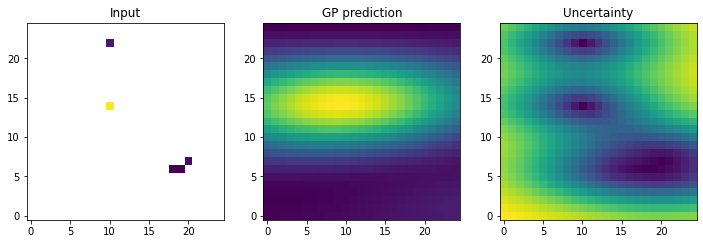

Step 2


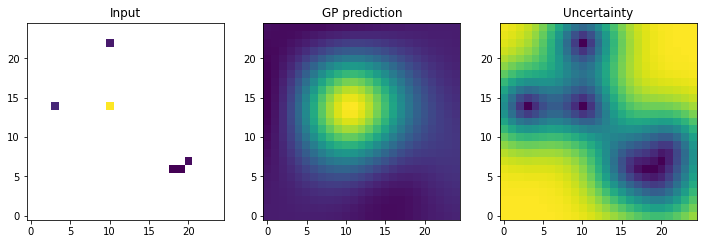

Step 3


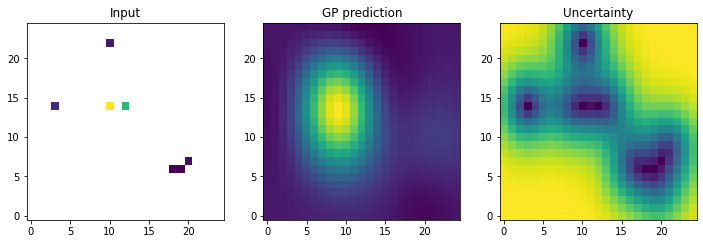

Step 4


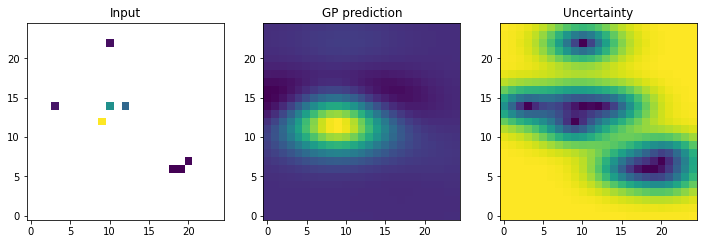

Step 5


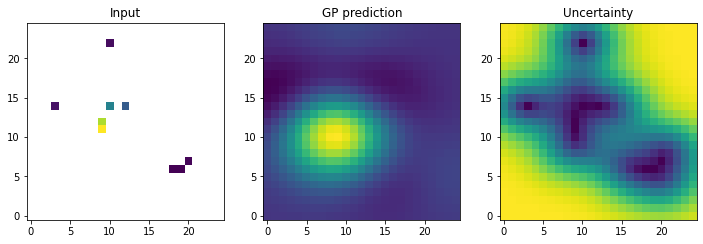

Step 6


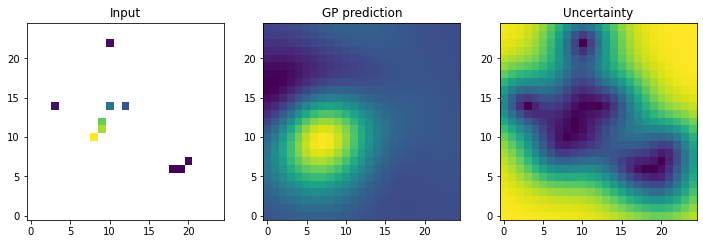

Step 7


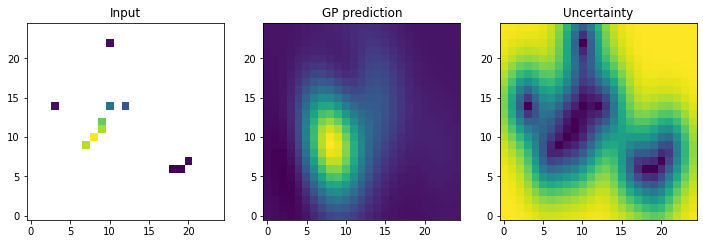

Step 8


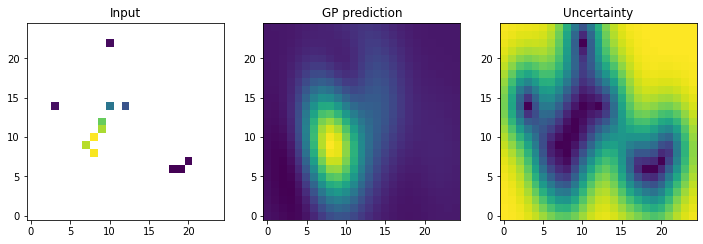

Step 9


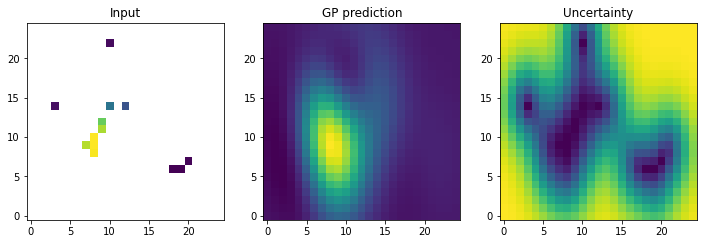

Step 10


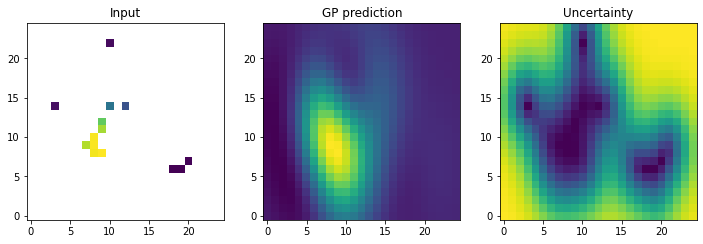

Step 11


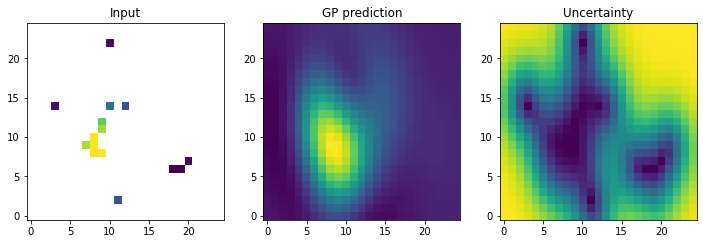

Step 12


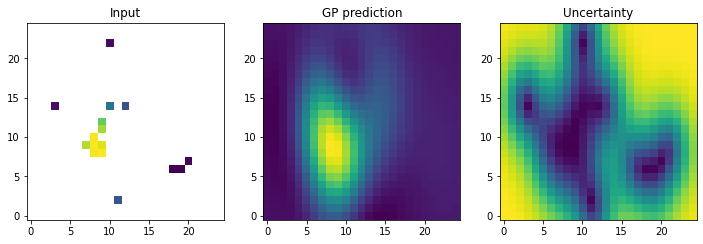

Step 13


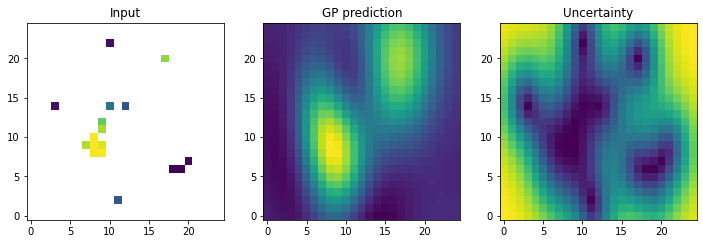

Step 14


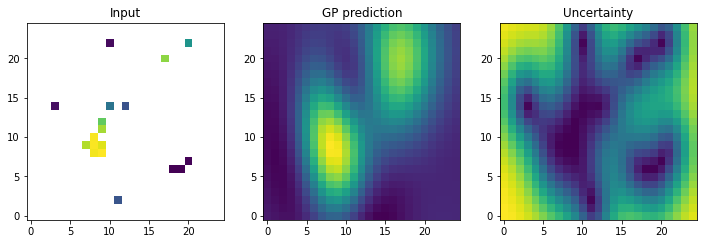

Step 15


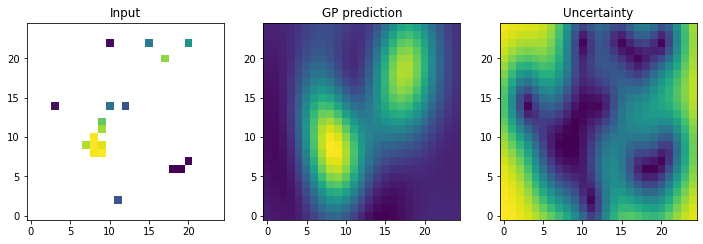

Step 16


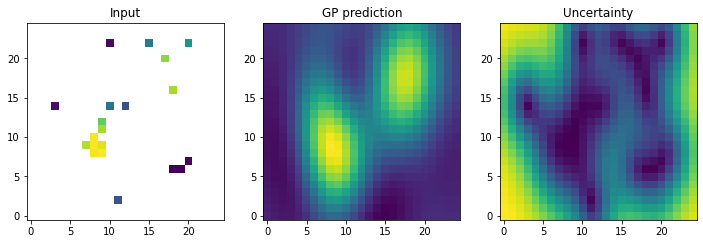

Step 17


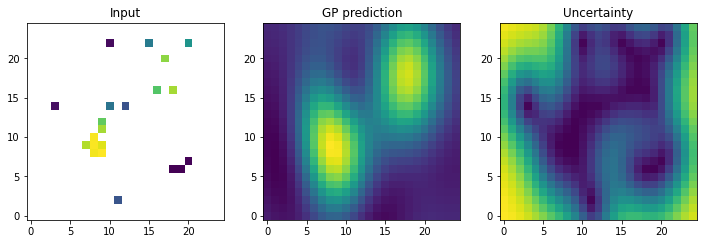

Step 18


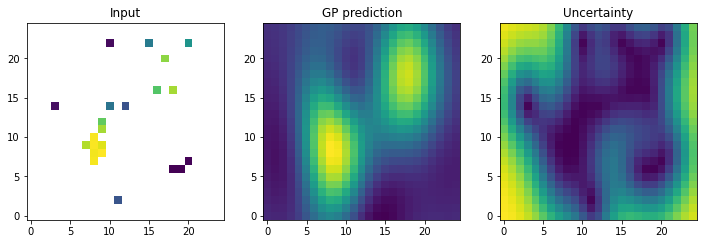

Step 19


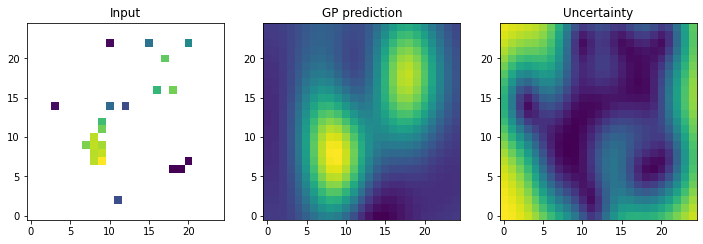

Step 20


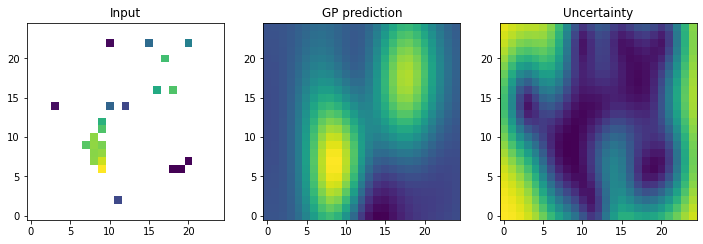

Step 21


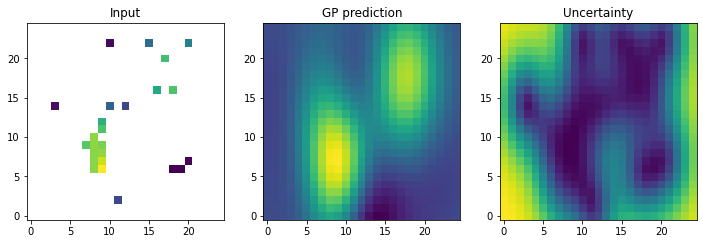

Step 22


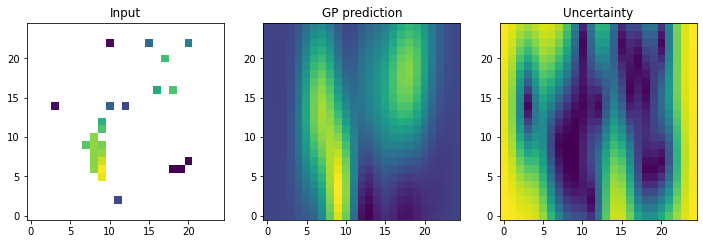

Step 23


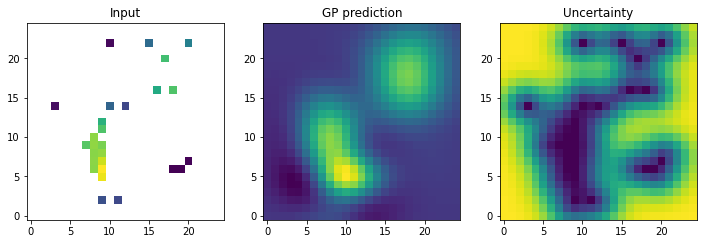

Step 24


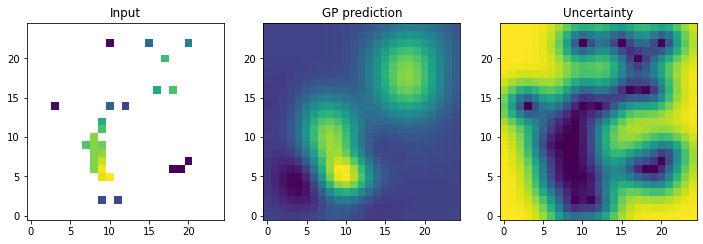

Step 25


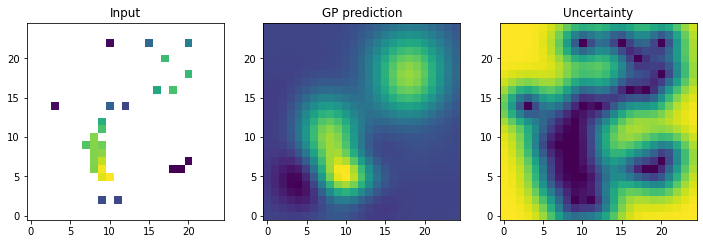

Step 26


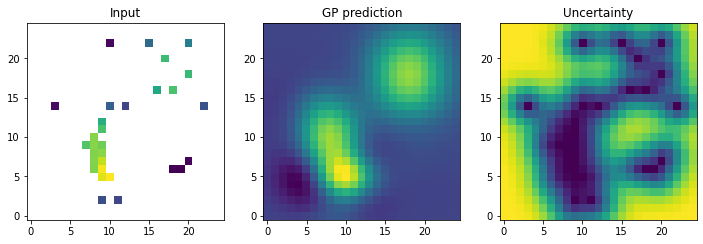

Step 27


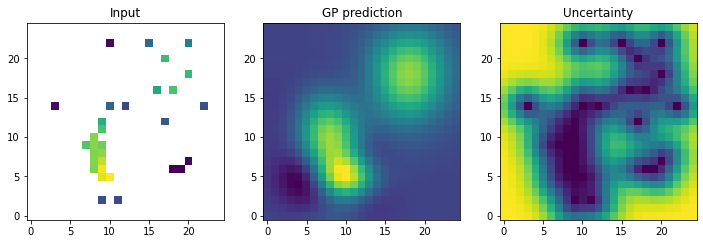

Step 28


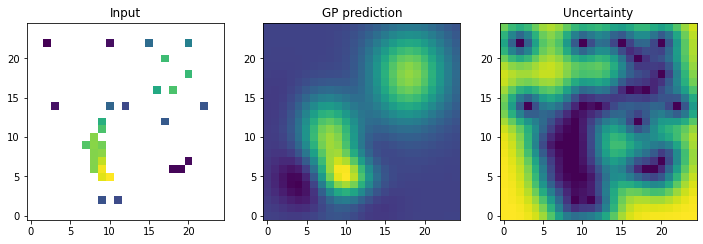

Step 29


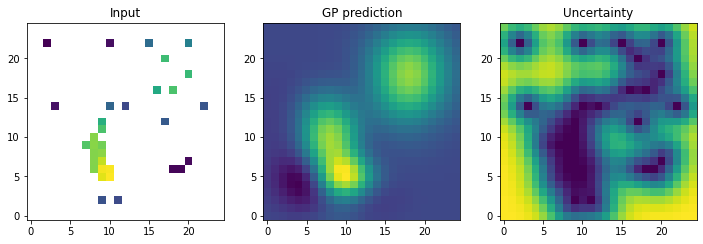

Step 30


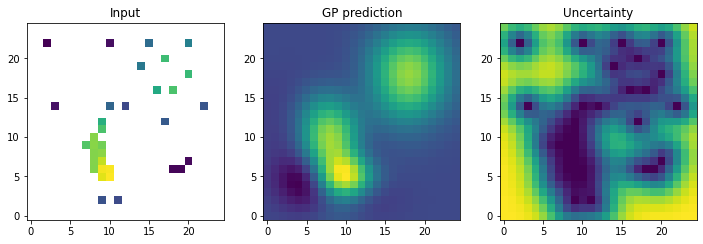

Step 31


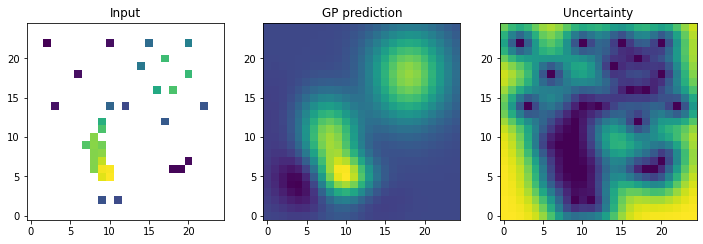

Step 32


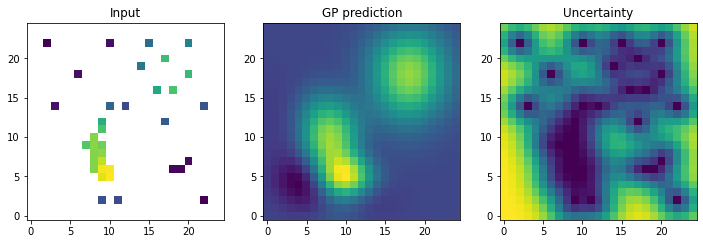

Step 33


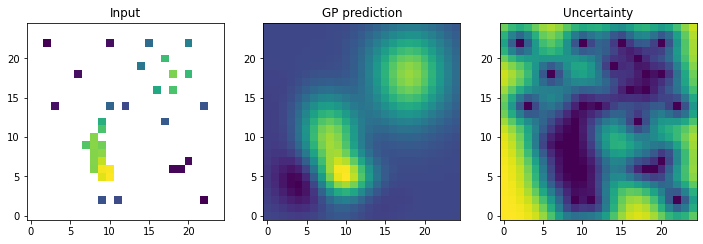

Step 34


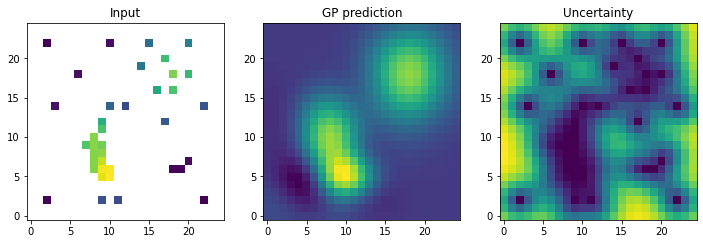

Step 35


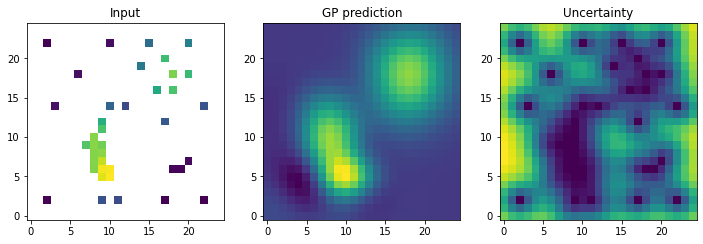

Step 36


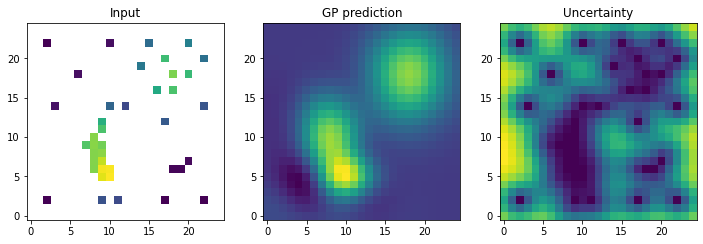

Step 37


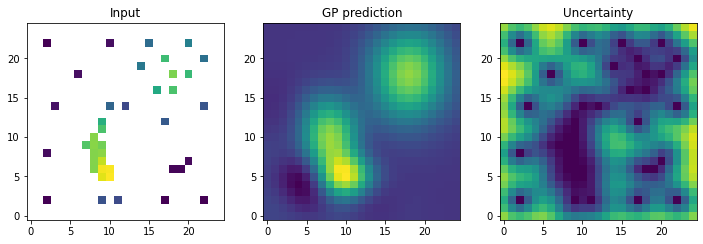

Step 38


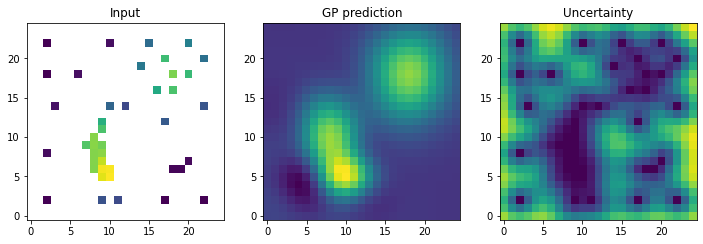

Step 39


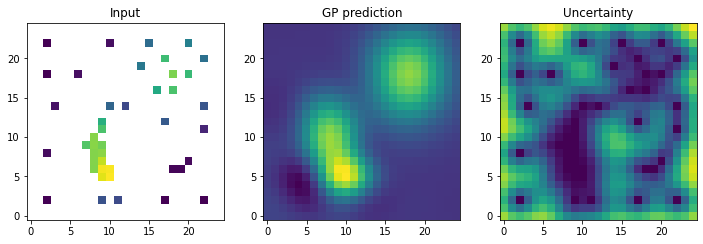

Step 40


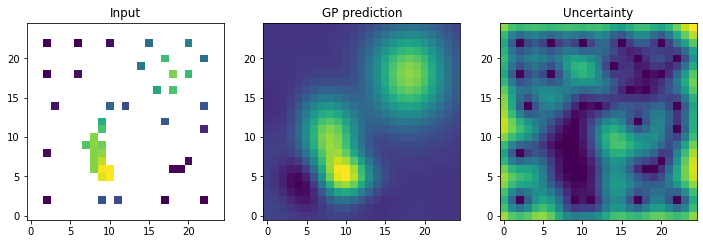

Step 41


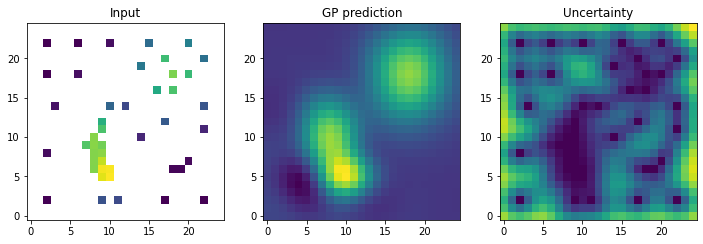

Step 42


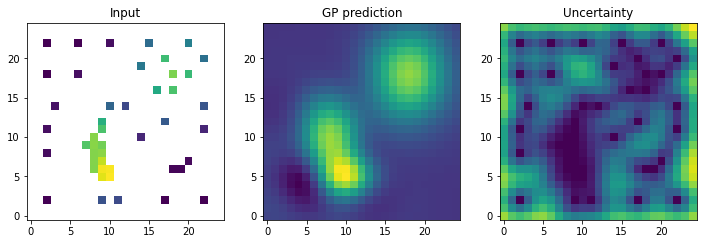

Step 43


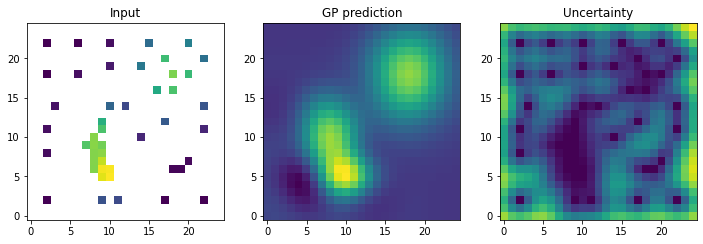

Step 44


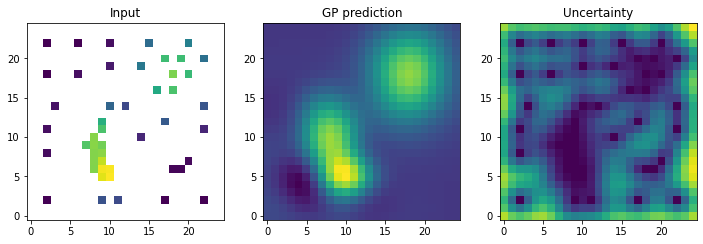

Step 45


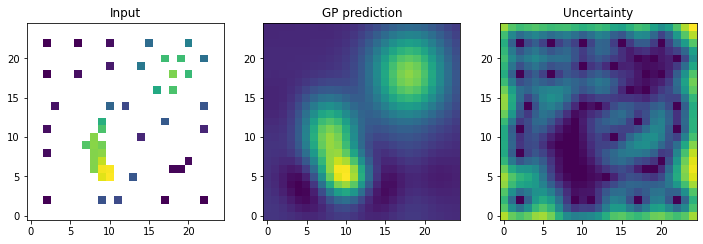

Step 46


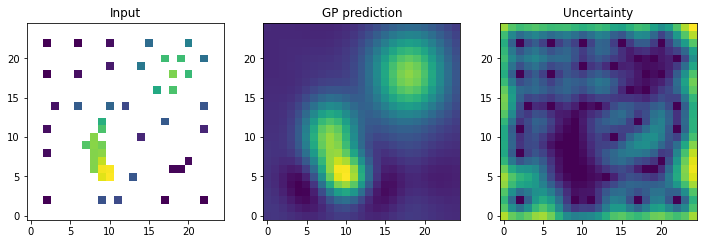

Step 47


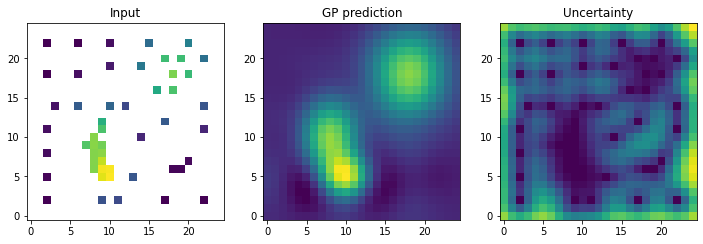

Step 48


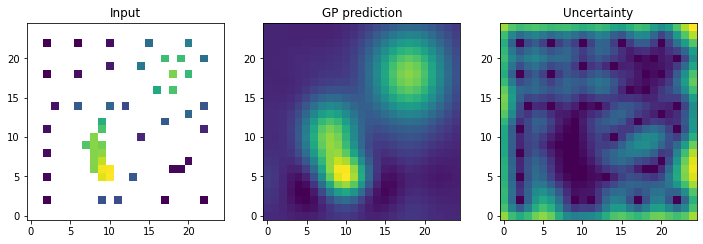

Step 49


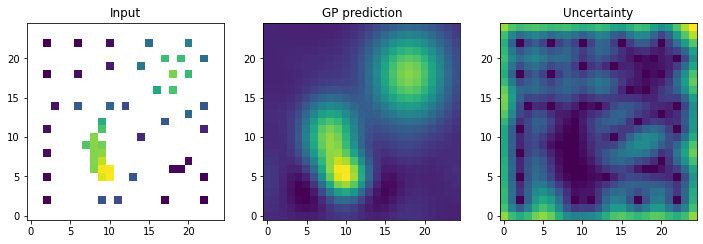

Step 50


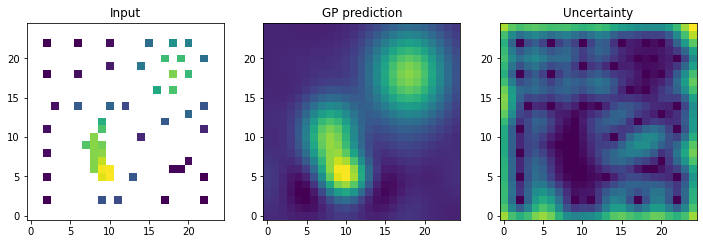

In [11]:
plot_exploration_results(boptim.target_func_vals, boptim.gp_predictions)

Plot all the query points:

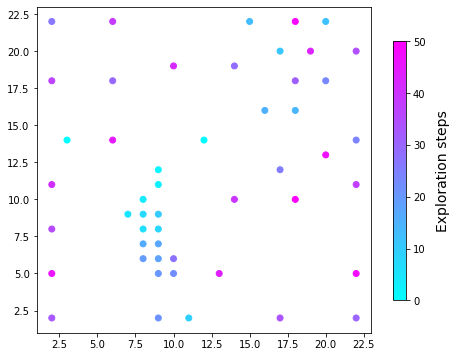

In [12]:
gpim.utils.plot_query_points(boptim.indices_all, plot_lines=False)

Now let's add an additional criterion for selecting the next query point, which will take into the account the distance to previous points. It can be understood as a short-term memory, where the point at step $s$ is chosen no closer than $d$ to the point selected at step $s−1$, $\gamma d$ to the point selected at step $s−2$, $\gamma^2d$ at step $s−3$, and so on. The corresppoding arguments are ```dscale``` (default 0), ```gamma``` (default 0.8), ```memory``` (default 10) and ```exit_strategy```, which determines what to do when none of the existing points satisfies the criteria. (See [documentation](https://gpim.readthedocs.io/en/latest/gpbayes.html) for more details)

Run BO again:

In [13]:
# Get full and sparse grids
X_full = gpim.utils.get_full_grid(Z_sparse)
X_sparse= gpim.utils.get_sparse_grid(Z_sparse)
# Initialize Bayesian optimizer with an 'expected improvement' acquisition function
boptim = gpim.boptimizer(
    X_sparse, Z_sparse, X_full, 
    trial_func, acquisition_function='ei',
    exploration_steps=50,
    dscale=4, memory=10,  # add distance-based criteria for point selection
    use_gpu=False, verbose=1)
# Run Bayesian optimization
boptim.run()


Exploration step 1 / 50
Model training...
average time per iteration: 0.0038 s
training completed in 3.63 s
Final parameter values:
 amp: 0.0358, lengthscale: [ 4.5529 12.4821], noise: 1.8e-06
Computing acquisition function...
Model training...
average time per iteration: 0.0039000000000000003 s
training completed in 3.7 s
Final parameter values:
 amp: 0.0315, lengthscale: [5.2424 5.2111], noise: 0.0

Exploration step 2 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0038 s
training completed in 3.61 s
Final parameter values:
 amp: 0.0294, lengthscale: [5.3729 3.7558], noise: 0.0

Exploration step 3 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0040999999999999995 s
training completed in 3.64 s
Final parameter values:
 amp: 0.1198, lengthscale: [3.3027 4.9983], noise: 0.0

Exploration step 4 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0037 s
training completed in 

Plot input data and GP predictions at each step:

Step 1


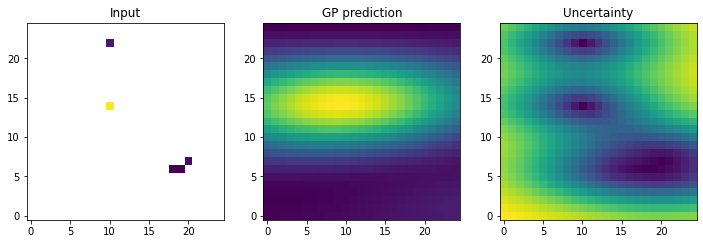

Step 2


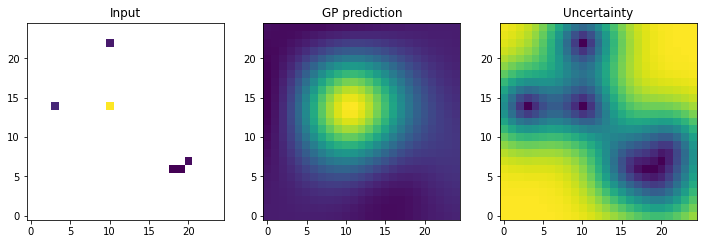

Step 3


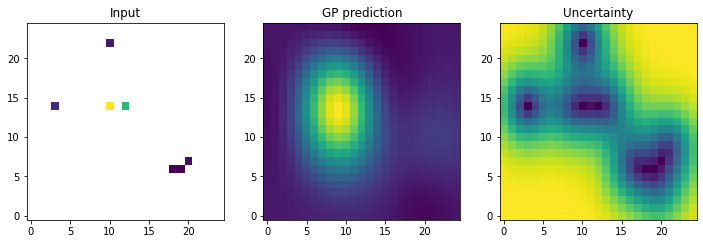

Step 4


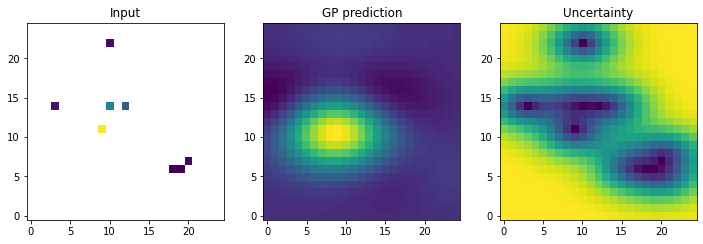

Step 5


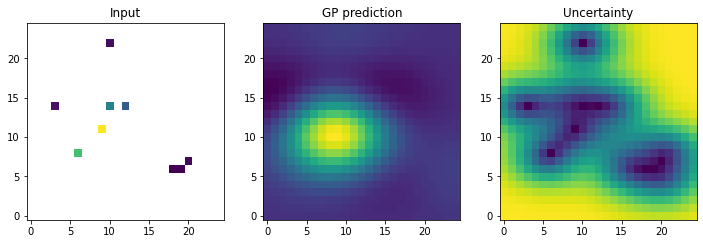

Step 6


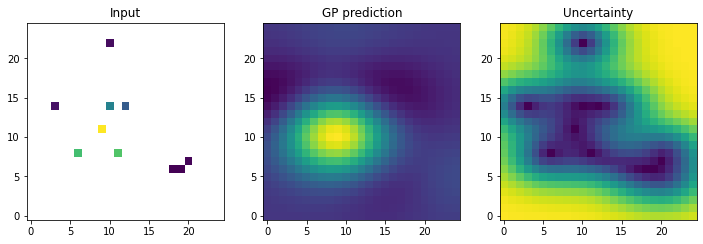

Step 7


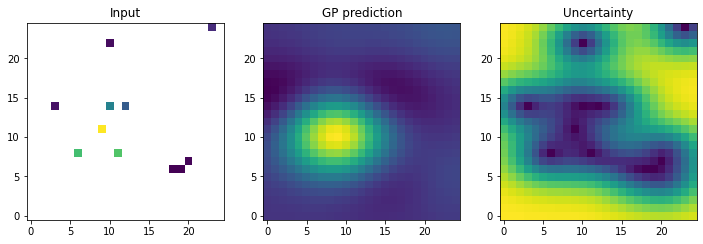

Step 8


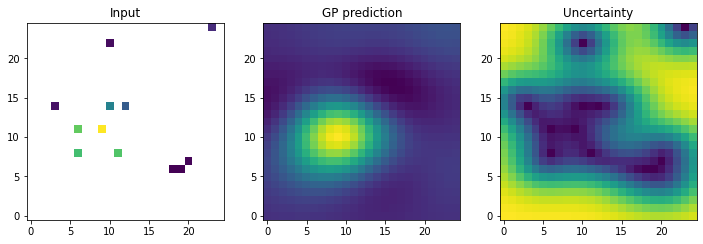

Step 9


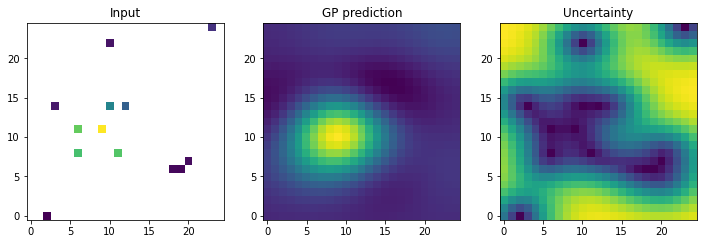

Step 10


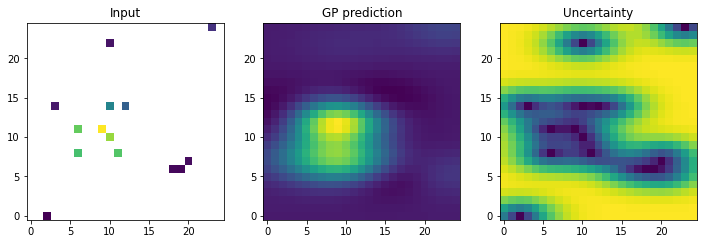

Step 11


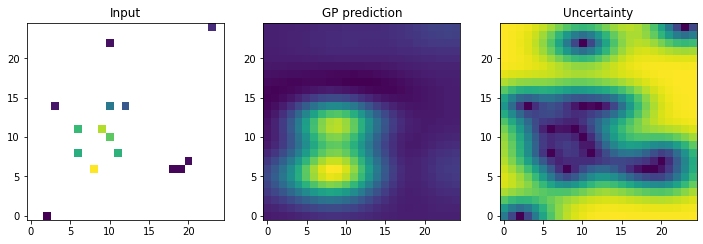

Step 12


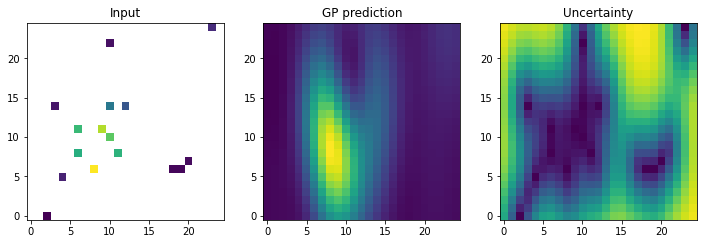

Step 13


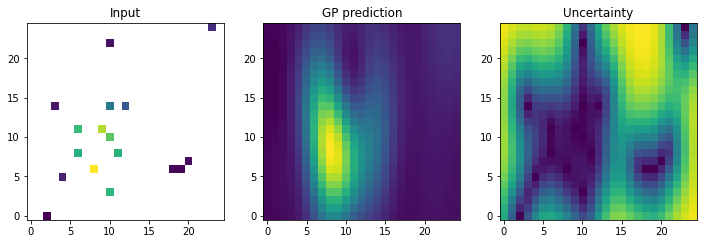

Step 14


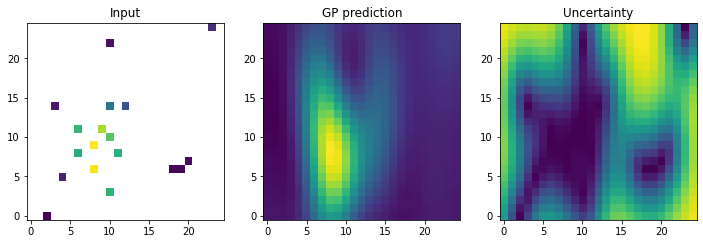

Step 15


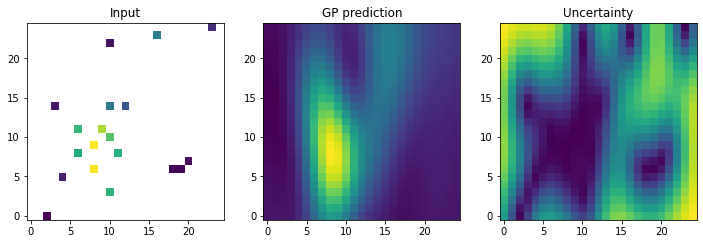

Step 16


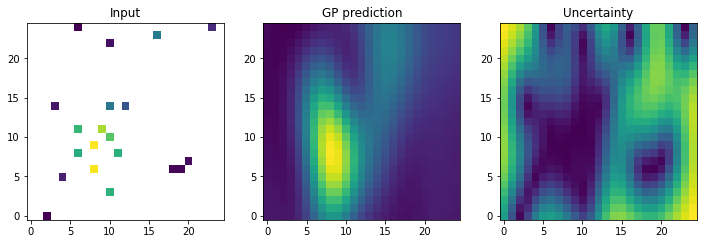

Step 17


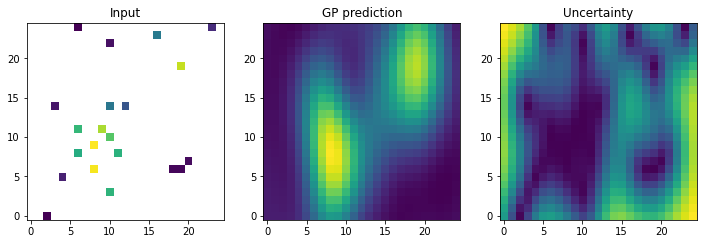

Step 18


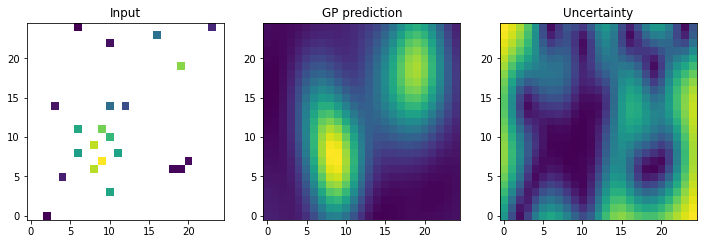

Step 19


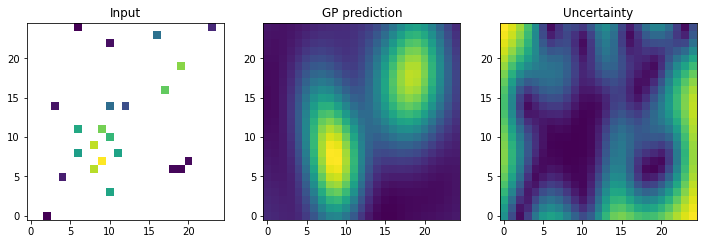

Step 20


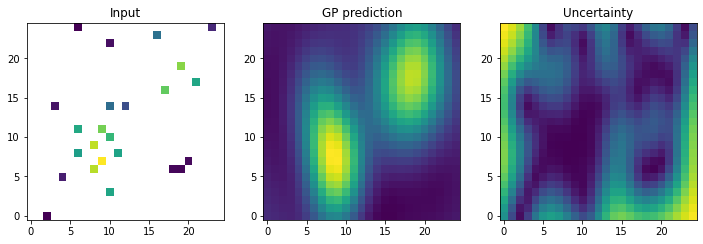

Step 21


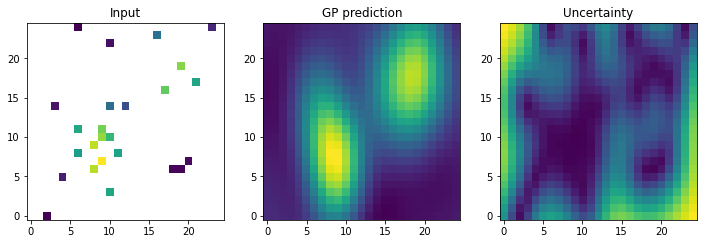

Step 22


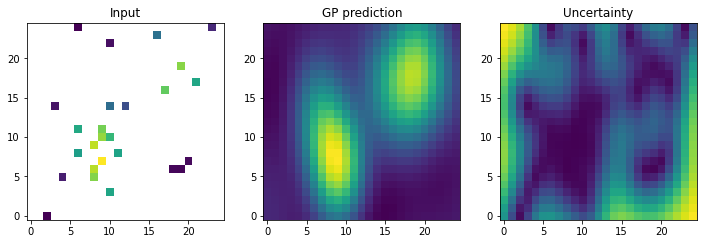

Step 23


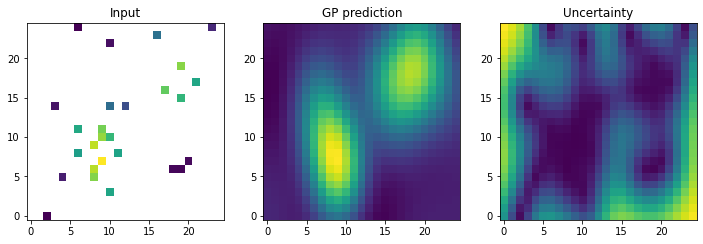

Step 24


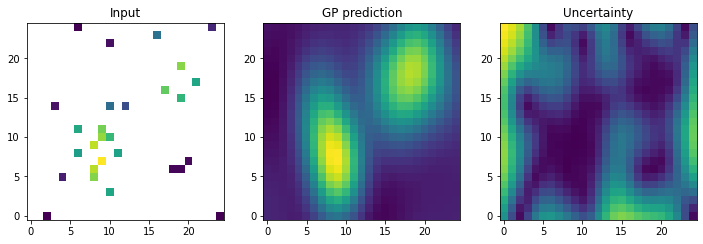

Step 25


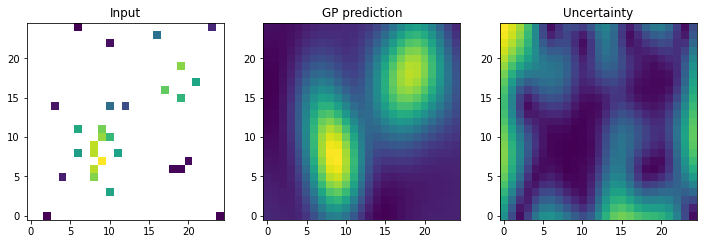

Step 26


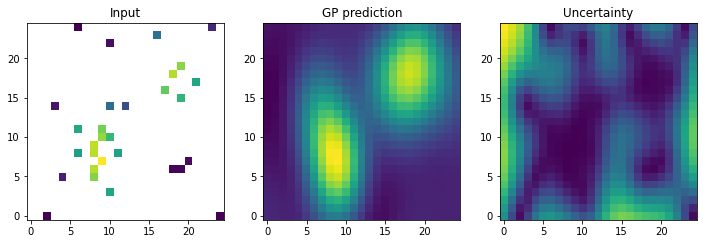

Step 27


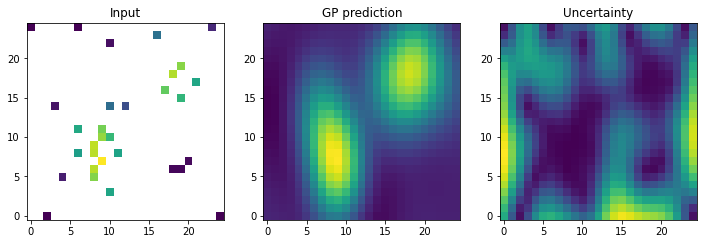

Step 28


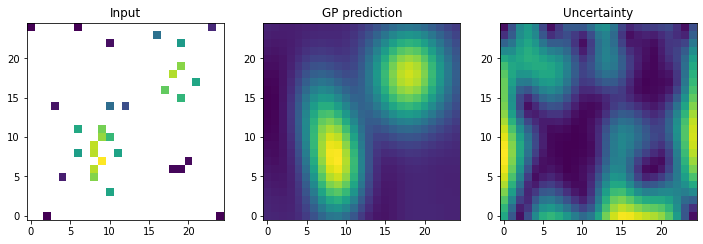

Step 29


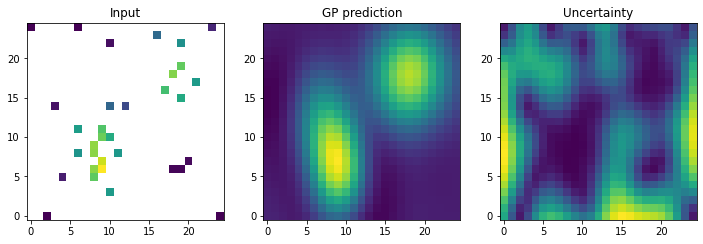

Step 30


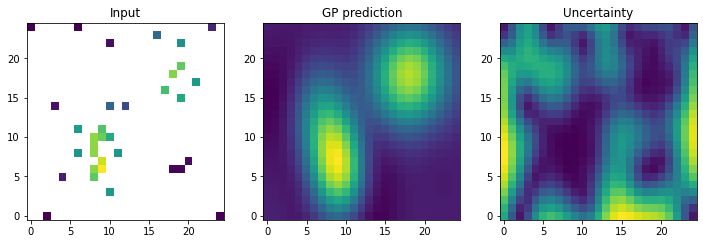

Step 31


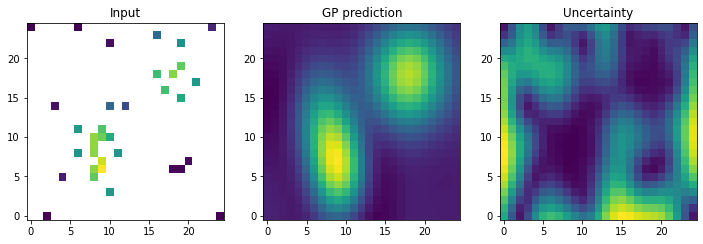

Step 32


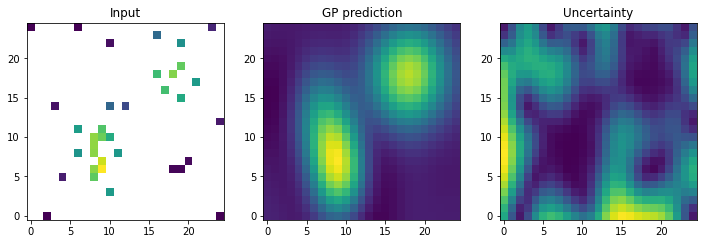

Step 33


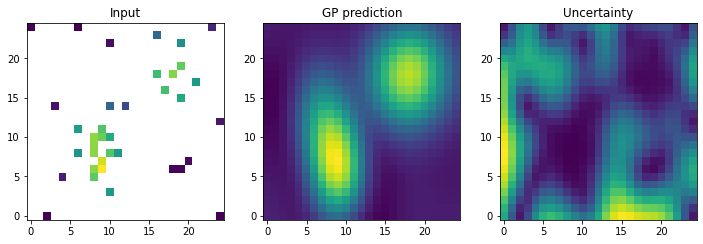

Step 34


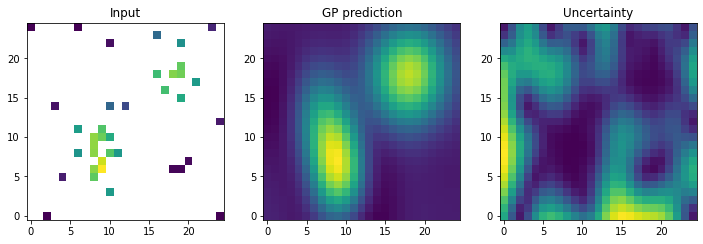

Step 35


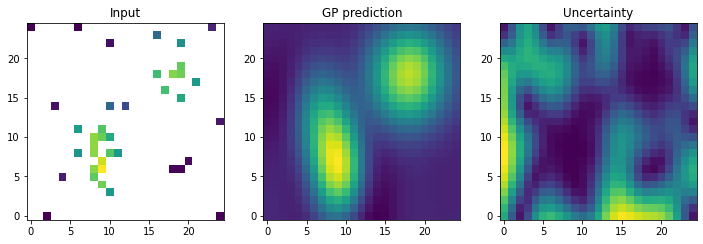

Step 36


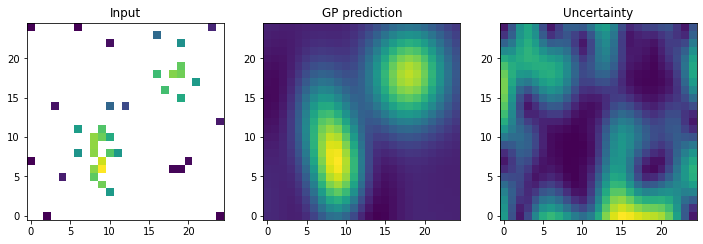

Step 37


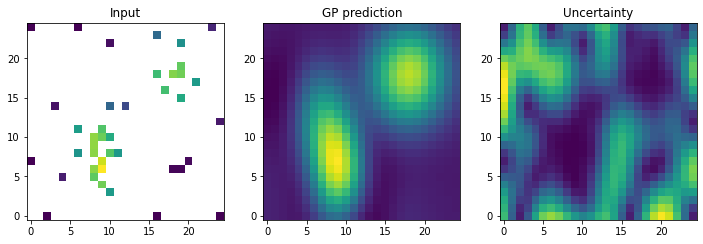

Step 38


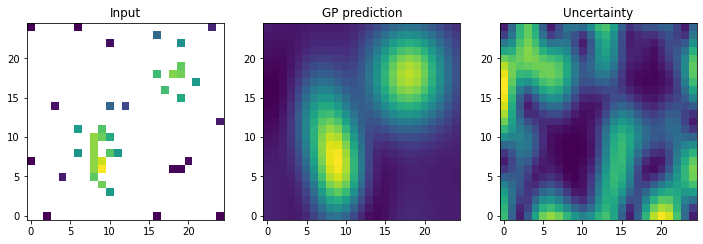

Step 39


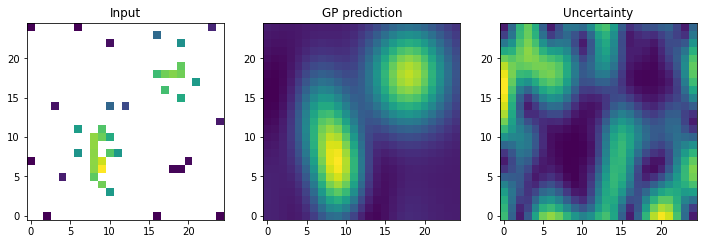

Step 40


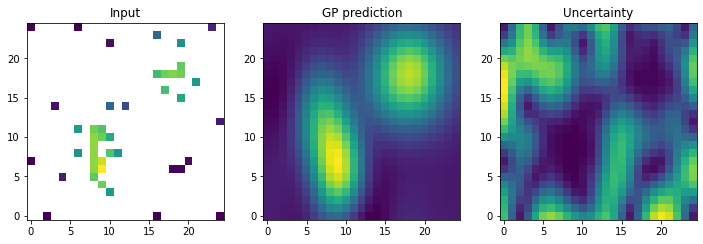

Step 41


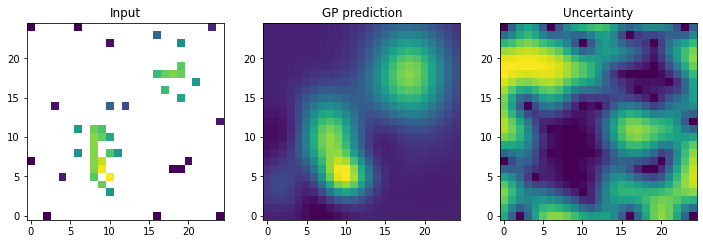

Step 42


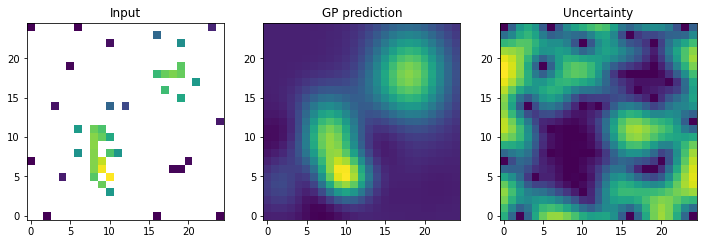

Step 43


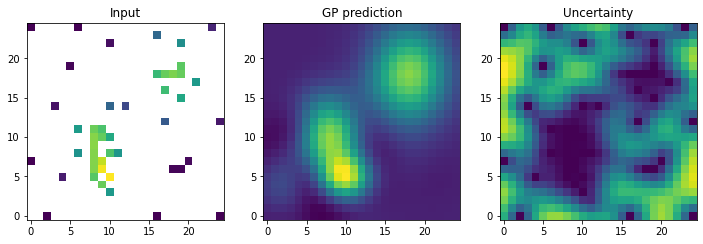

Step 44


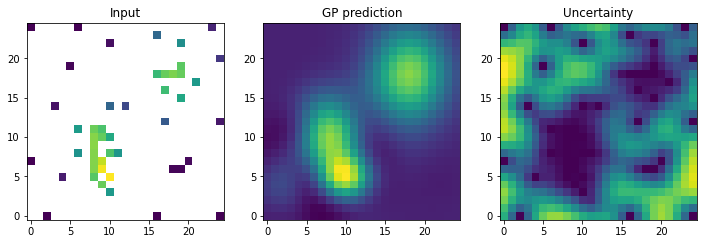

Step 45


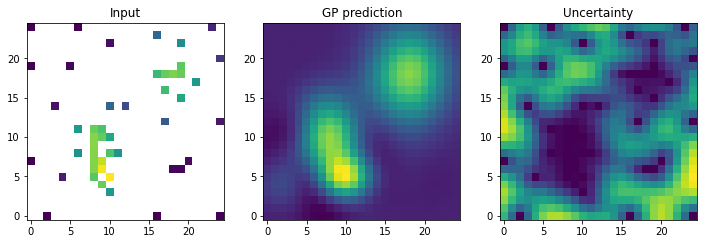

Step 46


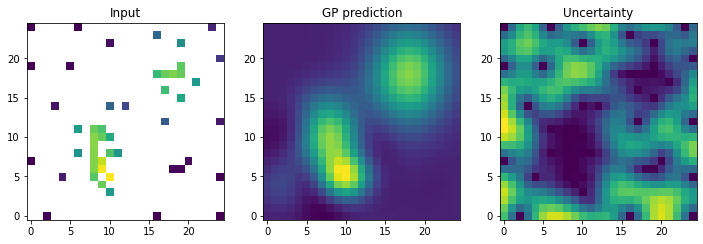

Step 47


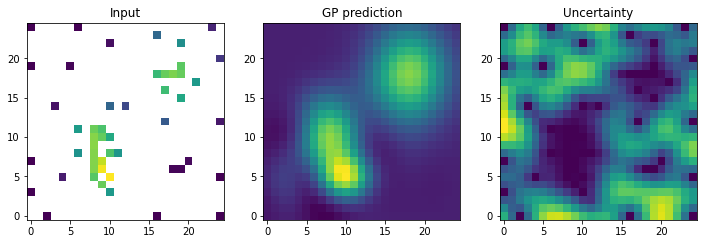

Step 48


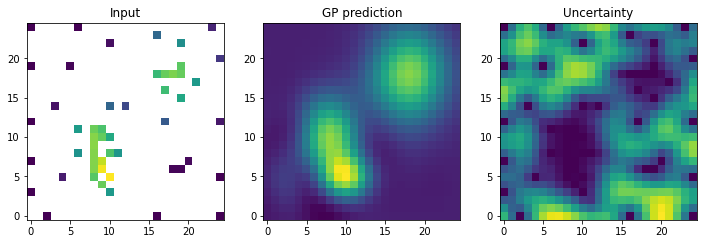

Step 49


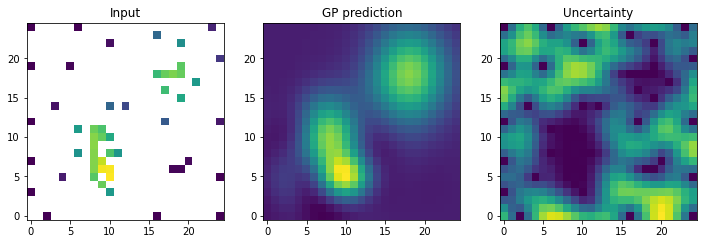

Step 50


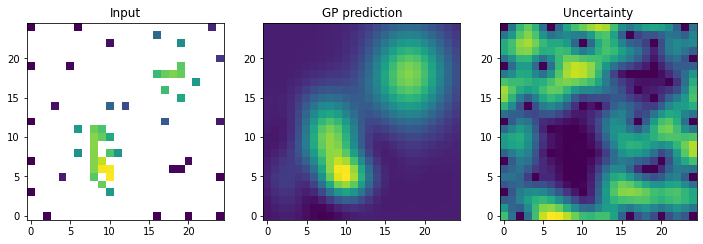

In [14]:
plot_exploration_results(boptim.target_func_vals, boptim.gp_predictions)

Plot all the query points:

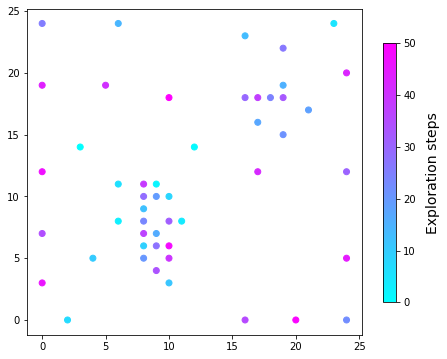

In [15]:
gpim.utils.plot_query_points(boptim.indices_all, plot_lines=False)

Finally, we can pass our own acquistion function:

In [16]:
 def acq(gpmodel, X_full, X_sparse):  # leave it as is
    mean, sd = gpmodel.predict(X_full, verbose=0) # leave it as is
    acq = 1 * mean + 5 * sd
    return acq, (mean, sd)  # leave it as is

Run BO again:

In [17]:
# Get full and sparse grids
X_full = gpim.utils.get_full_grid(Z_sparse)
X_sparse= gpim.utils.get_sparse_grid(Z_sparse)
# Initialize Bayesian optimizer with a custom acquisition function
boptim = gpim.boptimizer(
    X_sparse, Z_sparse, X_full, 
    trial_func, acquisition_function=acq,  # add custom acquisition function
    exploration_steps=50,
    use_gpu=False, verbose=1)
# Run Bayesian optimization
boptim.run()


Exploration step 1 / 50
Model training...
average time per iteration: 0.0040999999999999995 s
training completed in 3.89 s
Final parameter values:
 amp: 0.0358, lengthscale: [ 4.5529 12.4821], noise: 1.8e-06
Computing acquisition function...
Model training...
average time per iteration: 0.0037 s
training completed in 3.6 s
Final parameter values:
 amp: 0.0294, lengthscale: [ 4.4529 12.5   ], noise: 0.0

Exploration step 2 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0039000000000000003 s
training completed in 3.64 s
Final parameter values:
 amp: 0.0289, lengthscale: [ 2.856 12.5  ], noise: 0.0

Exploration step 3 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0038 s
training completed in 3.81 s
Final parameter values:
 amp: 0.0238, lengthscale: [ 1.8671 12.5   ], noise: 0.0

Exploration step 4 / 50
Computing acquisition function...
Model training...
average time per iteration: 0.0038 s
training completed

Plot input data and GP predictions at each step:

Step 1


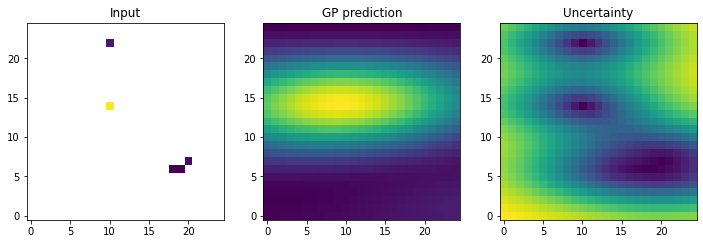

Step 2


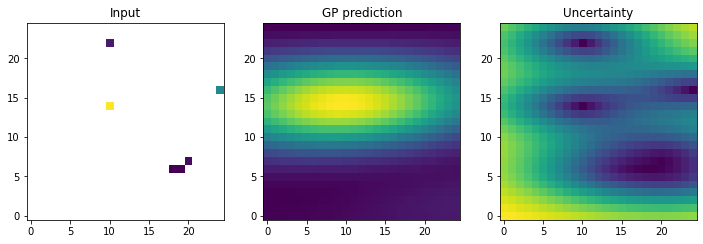

Step 3


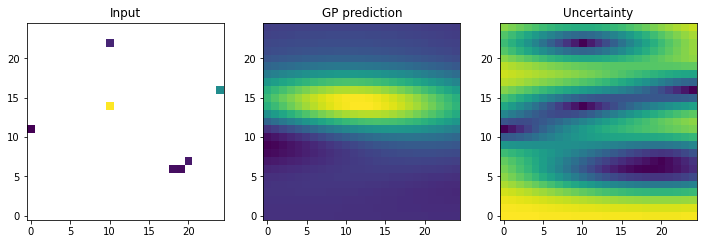

Step 4


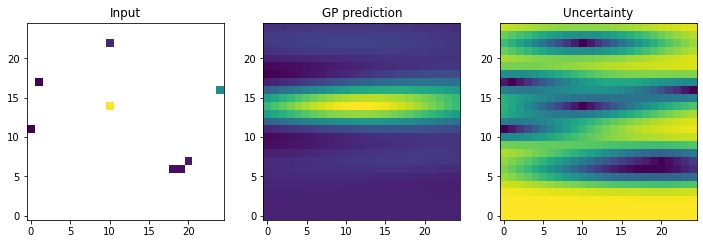

Step 5


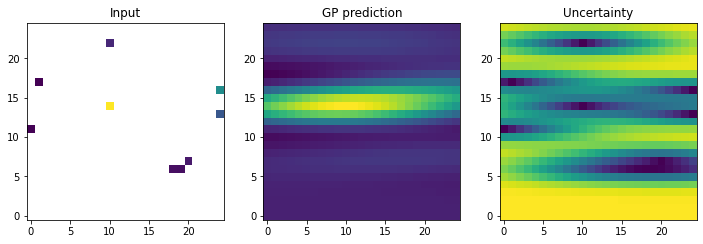

Step 6


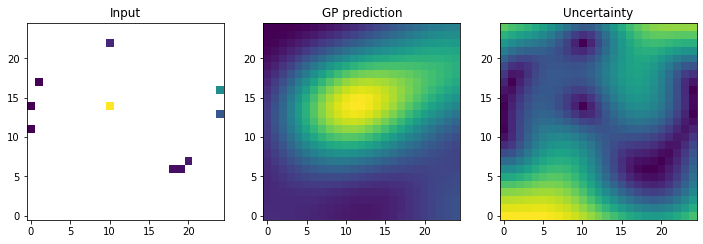

Step 7


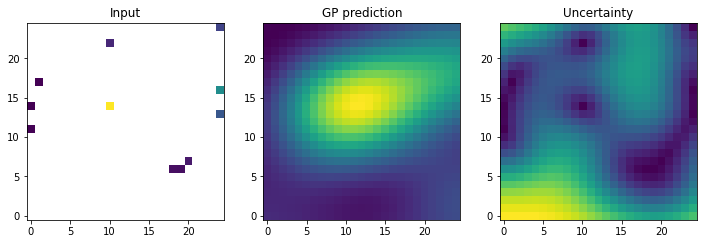

Step 8


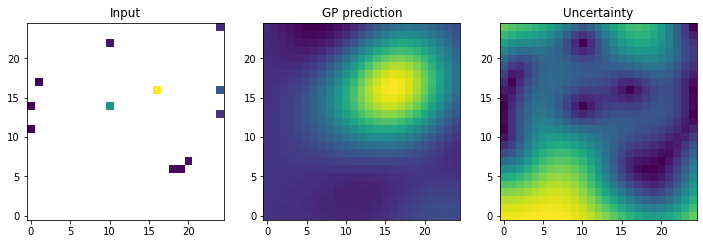

Step 9


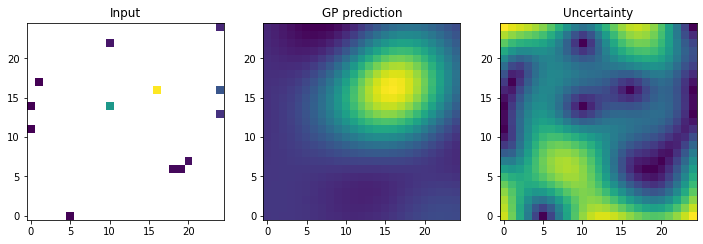

Step 10


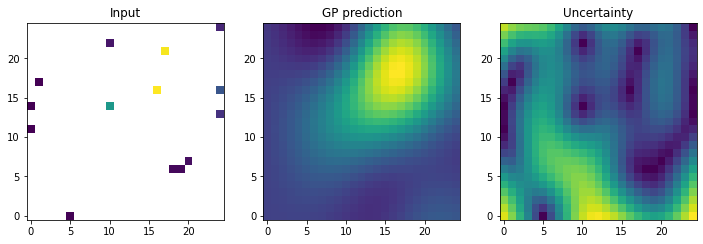

Step 11


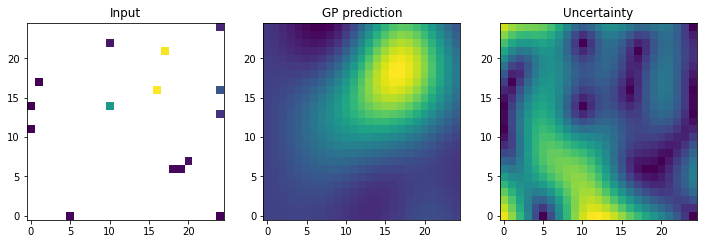

Step 12


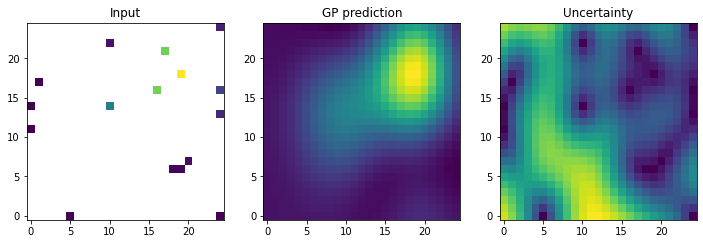

Step 13


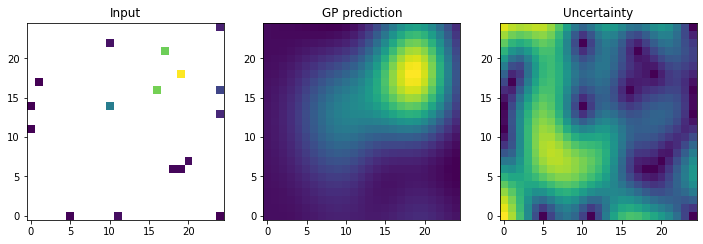

Step 14


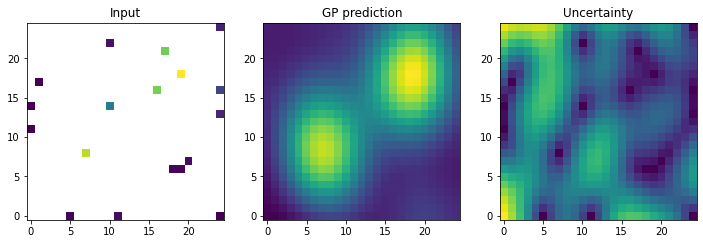

Step 15


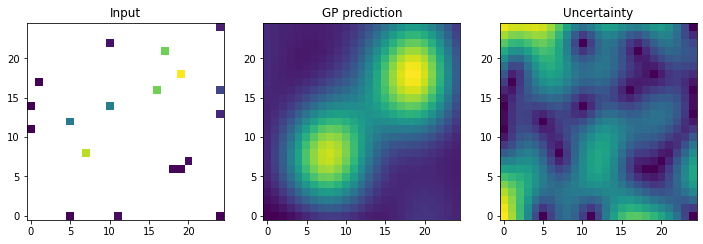

Step 16


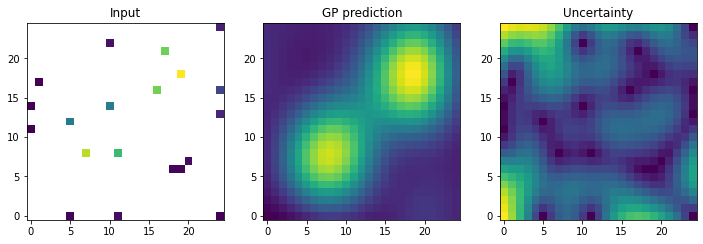

Step 17


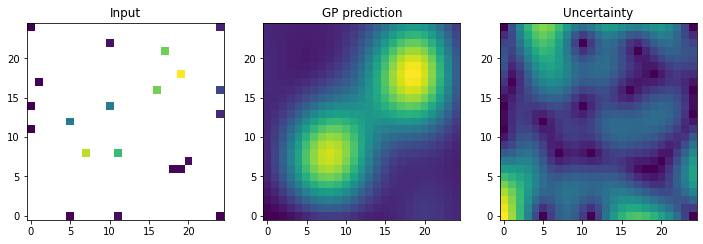

Step 18


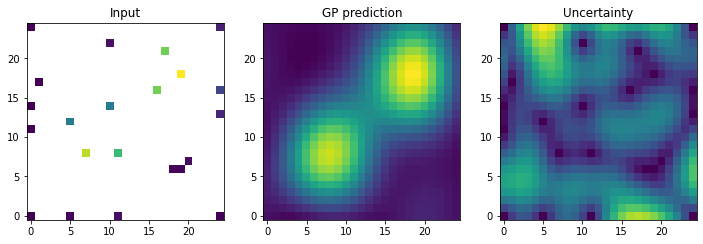

Step 19


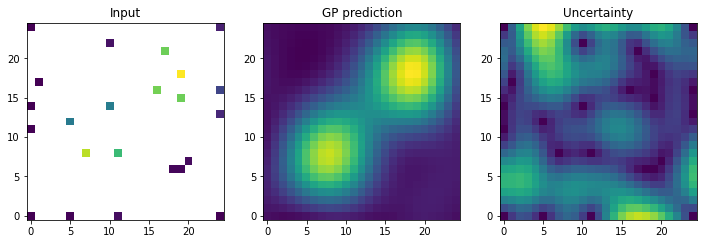

Step 20


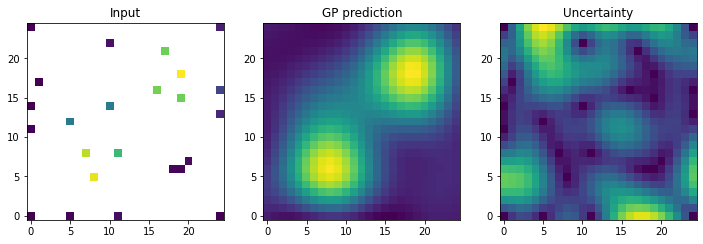

Step 21


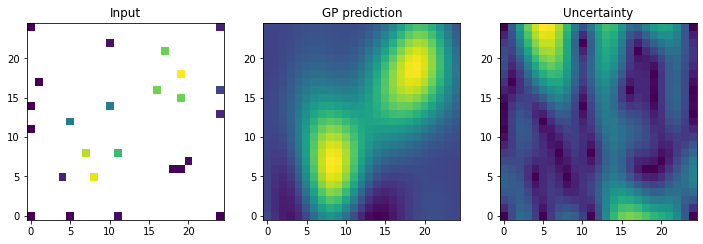

Step 22


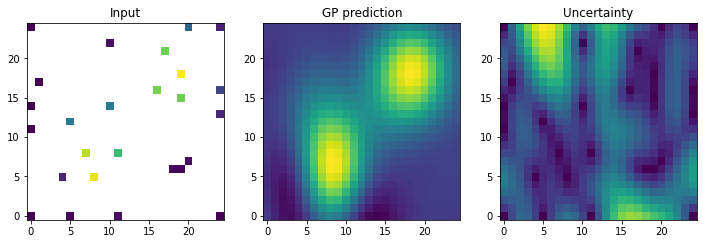

Step 23


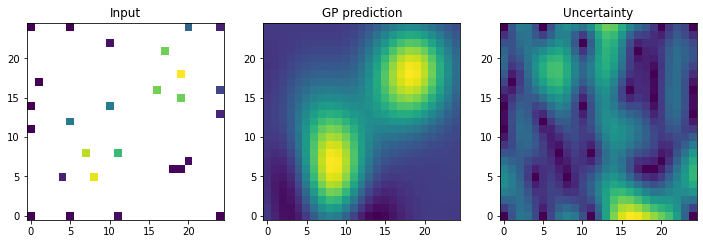

Step 24


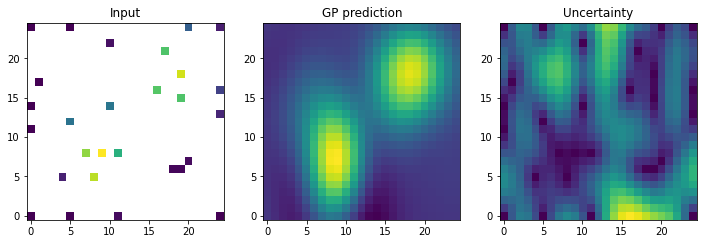

Step 25


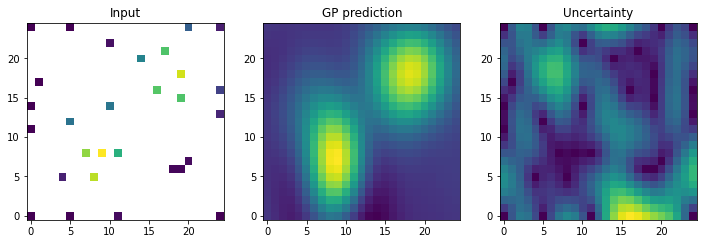

Step 26


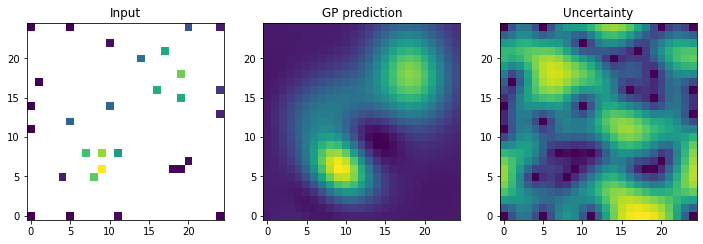

Step 27


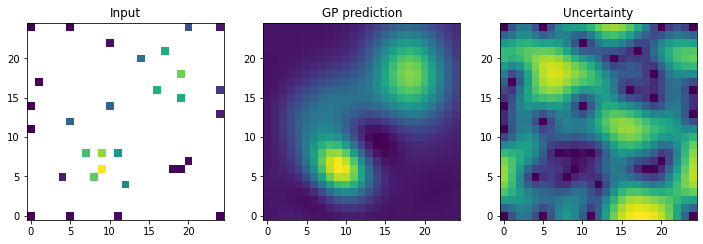

Step 28


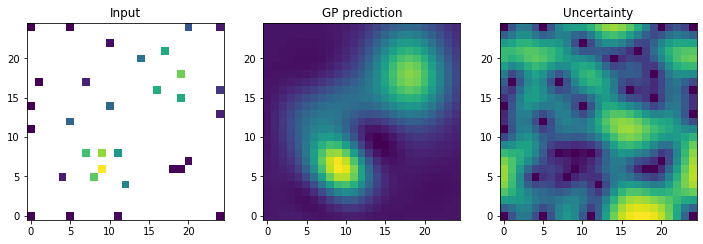

Step 29


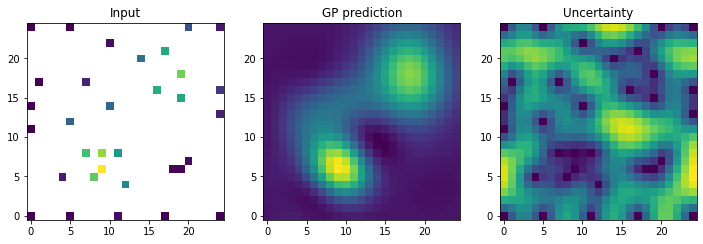

Step 30


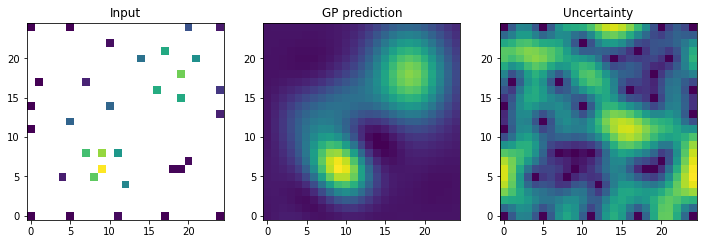

Step 31


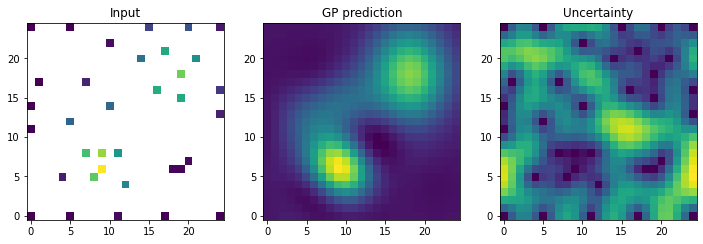

Step 32


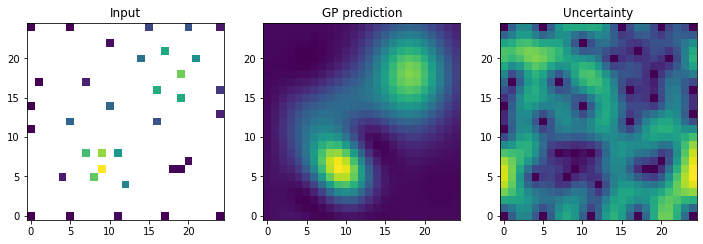

Step 33


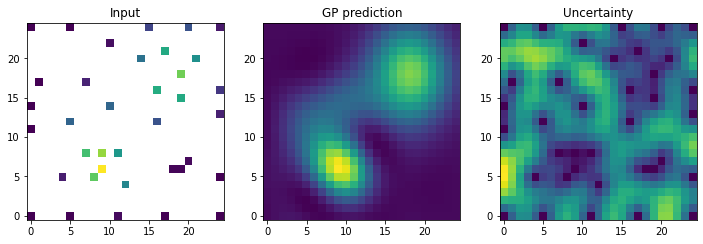

Step 34


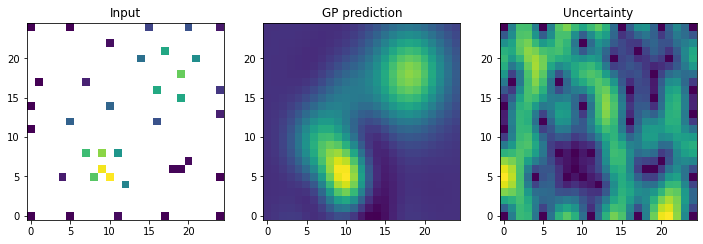

Step 35


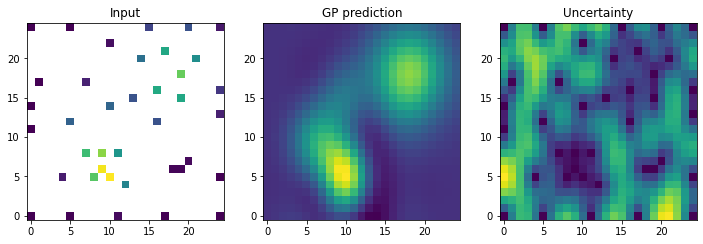

Step 36


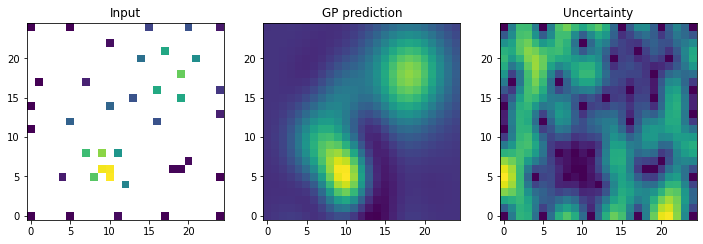

Step 37


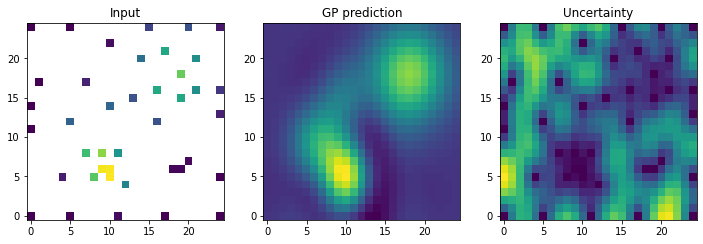

Step 38


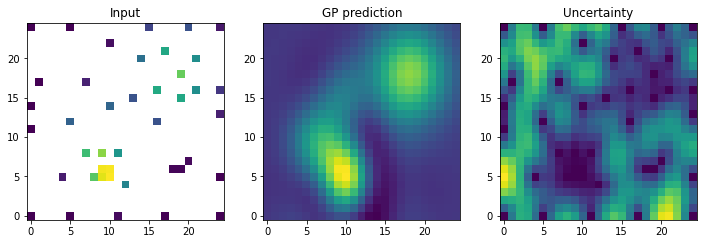

Step 39


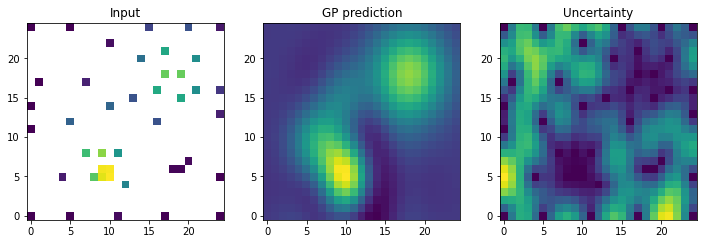

Step 40


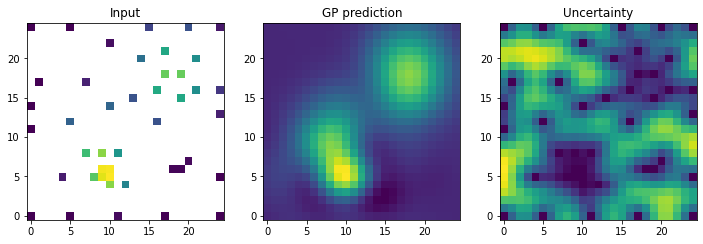

Step 41


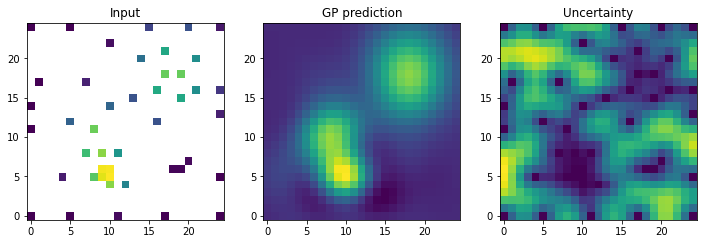

Step 42


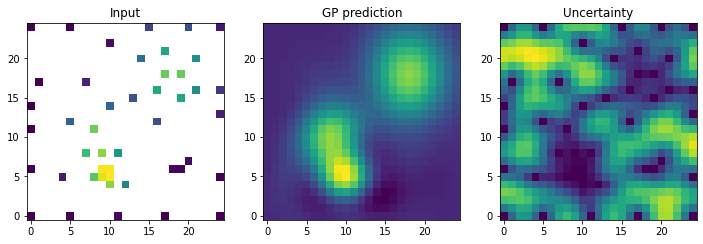

Step 43


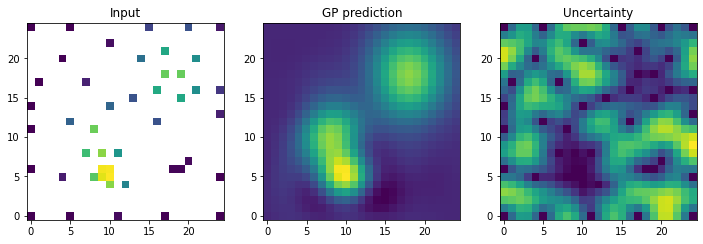

Step 44


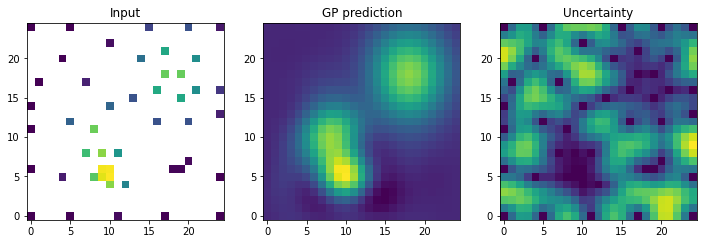

Step 45


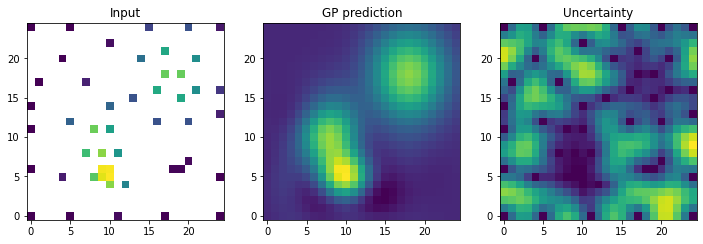

Step 46


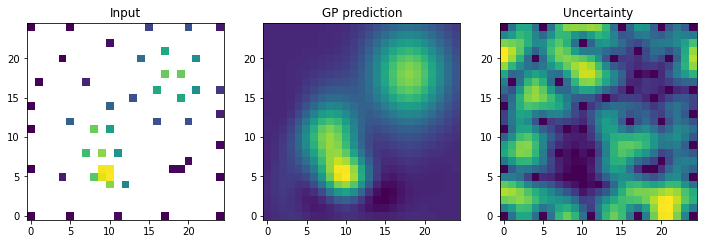

Step 47


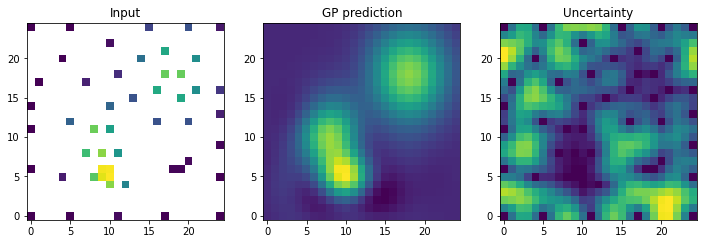

Step 48


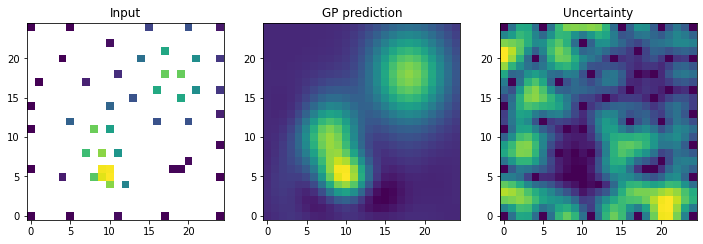

Step 49


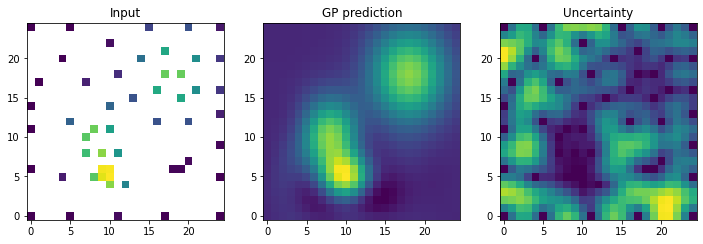

Step 50


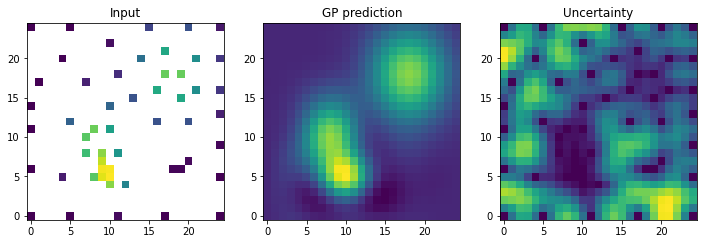

In [18]:
plot_exploration_results(boptim.target_func_vals, boptim.gp_predictions)

Plot all the query points:

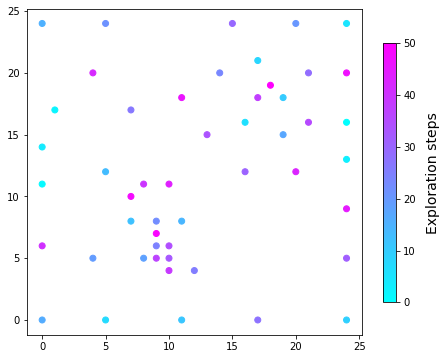

In [19]:
gpim.utils.plot_query_points(boptim.indices_all, plot_lines=False)